# Исследование объявлений о продаже квартир

**Цель исследования:**

Определить рыночную стоимость объектов недвижимости:
1. Изучить влияние параметров непосредственно на стоимость объектов.
2. Выделить наиболее значимые параметры для создания автоматизированной системы.

**Входные данные:** данные сервиса Яндекс Недвижимость о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за последние несколько лет.

**Ход исследования:**

Исследование состоит из следующих последовательных пяти этапов: 

- изучить общую информацию о данных
- осуществить преодобработку данных
- рассчитать необходимые показатели и добавить их в датафрейм
- выдвинуть и проверить гипотезы в исследовательской части анализа
- подготовить заключительный вывод

## Изучение общей информации

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#отключим предупреждения
import warnings
warnings.filterwarnings('ignore')

In [3]:
#считаем данные из csv-файла в датафрейм и сохраним в переменную data
data = pd.read_csv('/Users/ekaterina/Desktop/Проект 3/real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
#выведем первые 20 строчек датафрейма data
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
#выведем основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

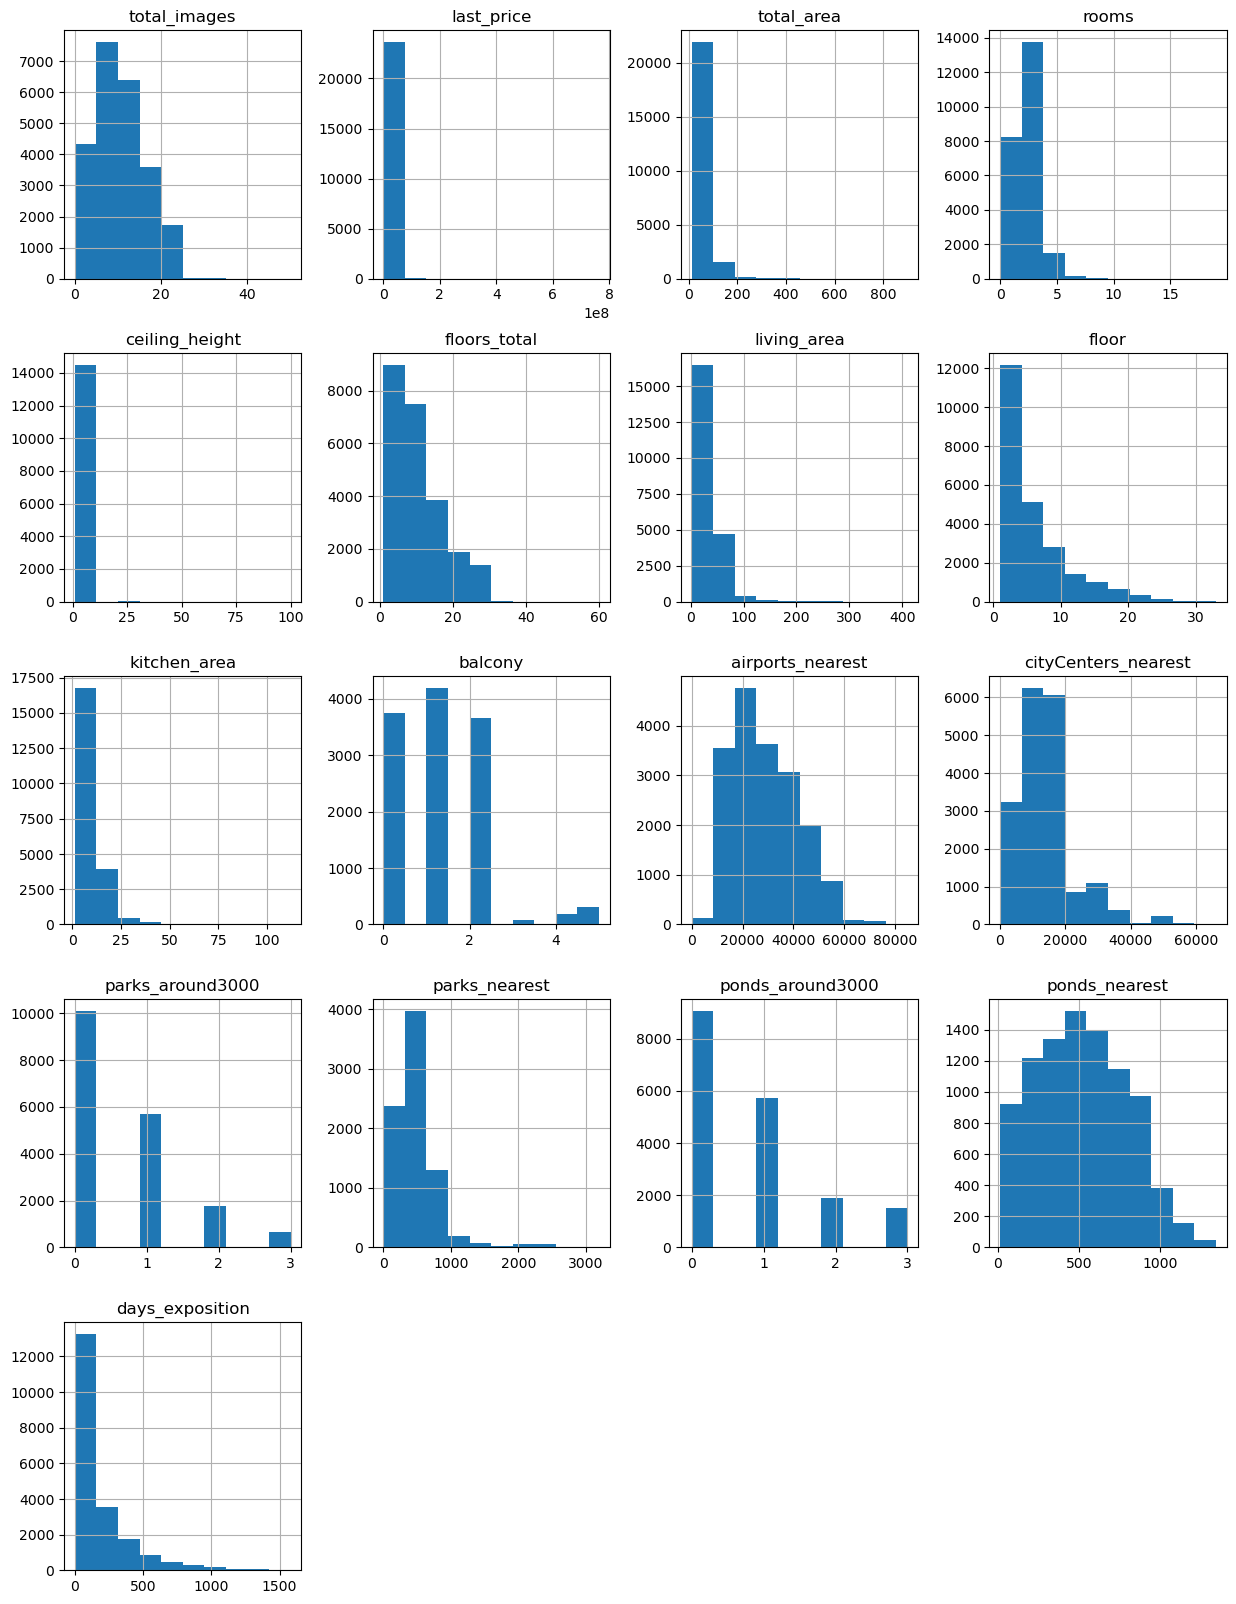

In [6]:
#построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15, 20))
plt.show()

**Промежуточный вывод:**

Всего больше 23 тыс. записей (23699).
Имеются столбцы с пропущенными значениями Nan.
Есть необходимость изменить данных в определенных столбцах.

## Предобработка данных

### Подведение всех данных под один регистр

In [7]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

### Определение пропущенных значений

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Вывод:**

`last_price` (float) – изменить тип данных на int

`first_day_exposition` (object) – изменить тип данных на datetime

`ceiling_height` (14504) – обработать нулевые значения

`floors_total` (23613, float) – обработать нулевые значения, изменить тип данных на int

`living_area` (21796) – обработать нулевые значения

`is_apartment` (object, 2775) – обработать нулевые значения, изменить тип данных на bool

`kitchen_area` (21421) – обработать нулевые значения

`balcony` (12180) – обработать нулевые значения

`locality_name` (23650) – обработать нулевые значения

`airports_nearest` (18157) – обработать нулевые значения

`cityCenters_nearest` (18180) – обработать нулевые значения, изменить регистр

`parks_around3000` (18181) – обработать нулевые значения, изменить тип данных на int

`parks_nearest` (8079, float) – обработать нулевые значения

`ponds_around3000` (18181, float) – обработать нулевые значения, изменить тип данных на int

`ponds_nearest` (9110) – обработать нулевые значения

`days_exposition` (20518, float) – обработать нулевые значения, изменить тип данных на int

### Заполнение пропущенных значений

In [10]:
#присвоем False квартирам не апартаментам в `is_apartment`
data['is_apartment'] = data['is_apartment'].fillna('False')

Причина значительного количества пропусков (20924) в **`is_apartment`** – тот факт, что если квартира не явлется апартаментами, пользователи не отмечают отсутствие такого типа недвижимости, а просто пропускают поле. Поэтому такой булев массив можно заполнить значением False, если квартира не является апартаментами.

In [11]:
#заполним `ceiling_height` медианными значениями
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median

#оставшиеся пропуски заполняем медианой по Ленинградской области
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

Причина большого количества пропусков (9195) в **`ceiling_height`** – отсутствие заполненных данных пользователи по разным причинам (возможно, сложность измерения высоты потолков, отсутствие необходимых для этого инструментов или высота ниже нормы, не разрешено законом). Заполним такие пропуски медианными значениями относительно населенного пункта, в котором находятся объекты.

In [12]:
#заменим строки с пропущенными значениями в `floors_total` нулевыми значениями
data['floors_total'] = data['floors_total'].fillna(0)

В связи с тем, что трудно установить взаимосвязь этого параметра с другими для заполнения, а также существует возможность исказить данные медианным значением по столбцу, было выбран вариант заполнить строки с пропущенными значениями (86 из 23699, меньше 0,3% от всего датасета) нулевыми значениями. Возможная причина пропусков – человеческий недосмотр, незнание этажности дома в случае его высотности.

In [13]:
#обозначим студиями все квартиры с пропусками в значениях по метражу кухонь
data.loc[data['kitchen_area'].isnull(),'studio'] = True

В **`studio`** отсутствуют пропуски, но здесь в связи с тем, что в любой квартире предусмотрено помещение для кухни, можно сделать вывод, что там, где нет кухни, это квартира-студия, при планировке которой не указывается кухонное помещение.

In [14]:
#заполним нулевыми значениями пропуски в `kitchen_area`
data['kitchen_area'] = data['kitchen_area'].fillna(0)

Причина небольшого количества пропусков (2278) в **`kitchen_area`** – идентична пропускам в `ceiling_height` и `living_area`. Согласно СП 54.13330.2022, кухня может иметь площадь не менее 5 кв. м. Учитывая, что в квартирах-студиях 0 ноль комнат и не указан метраж кухни, следовательно значения с пропусками в данном столбце являются квартирами-студиями. Заполним пропуски на нулевые значения.

In [15]:
#заполним нулевыми значениями пропуски в `balcony`
data['balcony'] = data['balcony'].fillna(0)

Причина значительного количества пропусков (11519) в **`balcony`** – та же, что и с предыдущем параметром. Если в квартире отсутствует балкон, пользователи пропускает данное поле для заполнения. Заполнить такого рода пропуск можно, следовательно, нулевым значением.

In [16]:
#заполним строки с пропущенными значениями в `locality_name` значением 'unknown'
data['locality_name'] = data['locality_name'].where(~data['locality_name'].isna(),'unknown')

В связи с тем, что заменить пропуски здесь другими значениями из столбца нелогично, а также невозможно установить адрес той или иной квартиры). Заполним пропущенные значения из датасета нулевыми значениями в связи с их минимальностью (49 из 23699). Возможная причина – отсуствие определенного названия у местности и озадаченность пользователя тем, что было бы более правильно записать в столбец: ничего или ближайшее поселение.

In [17]:
#заполним строки нулевыми значениями в `parks_around3000`, `ponds_around3000`
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Причина небольшого количества пропусков (5518) в **`parks_around3000`** и **`ponds_around3000`** – отсутствие таковых в радиусе 3 км для одних и тех же столбцов. Заполним данные нулевыми значениями.

In [18]:
#заполним строки нулевыми значениями в `airports_nearest` и `city_centers_nearest`
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(0)

Причина небольшого количества пропусков (5542) в **`airports_nearest`**, а также (5519) в **`city_centers_nearest`** в большинстве случаев в одних и тех же столбцах — отсутствие автоматически заполняемых данных, нехватка картографических данных. Заполним данные нулевыми значениями.

In [19]:
#заполним строки нулевыми значениями в `parks_nearest` и `ponds_nearest`
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)

Причина значительного количества пропусков (15620) в **`parks_nearest`** и (14589) в **`ponds_nearest`** – отсутствие по близости парков и прудов, что подтверждается также пропущенными значениями в `parks_around3000` и `ponds_around3000`. Заполним данные медианными значениями.

In [20]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

**Вывод:**

**Где была произведена замена:**
- (20924) в **`is_apartment`** 

- (11519) в **`balcony`**

- (9195) в **`ceiling_height`**

- **`studio`** (записи с пропусками в кухнях были отнесены к квартирам-студиям)

- (2278) в **`kitchen_area`**

- (86) в **`floors_total`**

- (49) **`locality_name`**

- (5542) **`airports_nearest`**, (15620) **`parks_nearest`**, (5519) **`city_centers_nearest`**

- (5518) **`parks_around3000`**, (5518) **`ponds_around3000`** 

**Где данные были оставлены с пропусками для дальнейшего анализа:**
1. Причина небольшого количества пропусков (1903) в **`living_area`** – пропуск пользователем данной информации вследствие незнания метража жилой части квартиры, отсутствия инструментов измерения или не подпадание под общепринятые стандарты жилой площади в России. Санитарная норма или минимум — 6 кв. м на одного человека. Оставим данные пропуски (8% от всего датасета) для дальнейшего анализа, т.к. их замена медианным значением, санитарной нормой или удаление могут значительно исказить данные.


2. Причина небольшого количества пропусков (3181) в **`days_exposition`** – тот факт, что объявления было размещено для продажи квартиры, но еще не снято, т.е. является до сих пор актуальным. Оставим данные как есть.

### Изменение типов данных

In [21]:
#изменим тип данных в `last_price' на int
data['last_price'] = data['last_price'].astype('int64')

In [22]:
#изменим тип данных в `first_days_exposition' на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [23]:
#изменим тип данных в `floors_total' на int
data['floors_total'] = data['floors_total'].astype('int64')

In [24]:
#изменим тип данных в `is_apartment` на bool
data['is_apartment'] = data['is_apartment'].astype(bool)

In [25]:
#изменим тип данных в `parks_around3000` на int
data['parks_around3000'] = data['parks_around3000'].astype('int64')

In [26]:
#изменим тип данных в `ponds_around3000' на int
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')

In [27]:
#изменим тип данных в `balcony` на int
data['balcony'] = data['balcony'].astype('int64')

In [28]:
#изменим тип данных в `airports_nearest` на int
data['airports_nearest'] = data['airports_nearest'].astype('int64')

In [29]:
#изменим тип данных в `city_centers_nearest` на int
data['city_centers_nearest'] = data['city_centers_nearest'].astype('int64')

In [30]:
#изменим тип данных в `parks_nearest` на int
data['parks_nearest'] = data['parks_nearest'].astype('int64')

In [31]:
#изменим тип данных в `ponds_nearest` на int
data['ponds_nearest'] = data['ponds_nearest'].astype('int64')

**Вывод:**

Замена с вещественного на целочисленный тип данных:
- `last_price` (цены указываются без остатка)
- `floors_total` (этаж указывается целым числом)
- `parks_around3000` (указывается целое число парков в радиусе 3 км)
- `ponds_around3000` (указывается целое число парков в радиусе 3 км)
- `balcony` (указывается целое число балконов)
- `airports_nearest` (указывается целое число метров, чтобы избавиться от лишних нулей)
- `city_centers_nearest` (указывается целое число метров, чтобы избавиться от лишних нулей)
- `parks_nearest` (указывается целое число метров, чтобы избавиться от лишних нулей)
- `ponds_nearest` (указывается целое число метров, чтобы избавиться от лишних нулей)
  
Замена со строкового на дату:
- `first_day_exposition` (в столбце содержится дата публикации)

Замена со строкового на булев тип:
- `is apartment` (аналолично `studio` и `open_plan` здесь содержится два значения (True - да, есть, False - нет, не имеется))

### Устранение явных и неявных дубликатов

In [32]:
#проверим данные на наличие явных дубликатов
data.duplicated().sum()

0

In [33]:
#изучим уникальные значения в `locality_name`
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [34]:
#приведем все значения к одному (нижнему) регистру
data['locality_name'] = data['locality_name'].str.lower()

In [35]:
#заменим букву ё на букву е
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')

In [36]:
#заменим `поселок городского типа` на `поселок`
data = data.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))
len(data.locality_name.unique())

331

In [37]:
#проверим на наличие дубликатов
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'посёлок городского типа красный бор', 'гатчина',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'посёлок молодцово',
       'посёлок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'посёлок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'посёлок торковичи', 'посёлок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посёлок новый свет

### Устранение аномалий

In [38]:
#проверим данные по их числовым значениям
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,21796.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.733877,10.635090,34.457852,5.892358,9.553814,0.591080,22060.285497,10886.426896,0.469049,167.315499,0.590911,199.114140,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.009388,6.616396,22.030445,4.885249,6.420973,0.959298,16455.276292,9634.613697,0.748534,306.709997,0.883999,305.188777,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,6.300000,0.000000,10196.500000,2242.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,21869.000000,11247.000000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,11.440000,1.000000,34327.000000,15248.500000,1.000000,301.000000,1.000000,389.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод:**

`total_images` – аномальных значений нет, обработка не требуется.

`last_price` – минимальная стоимость квартиры равна 12190, это выбивающееся значение, поэтому обработаем его. Аналогично поступим с максимальной стоимостью квартир свыше 100 млн. 

`total_area` - минимальная площадь квартиры (12 кв. м) находится в пределах нормы, но максимальная стоимость свыше 200 кв. м является крайне премиальной недвижимостью, данные о которой могут создать перевес в данных и изменить среднее/медианное значения, поэтому обработаем ее.

`rooms` - квартиры с нулем комнат являются студиями, апартаментами или квартирами с открытой планировкой, максимальное же количество комнат 19. Обработаем значения выше 7 комнат.

`ceiling_height` – согласно рекомендациям СП 54.13330.2011 в подавляющем большинстве квартир, независимо от года постройки, высота от пола до потолочной поверхности колеблется в пределах 2,5-3,2м, следовательно, данные ниже 2 м и свыше 4 м удалим, т.к. они являются выбивающимися значениями. Округлим данные в случае квартир с отклонениями от общепринятого стандарта. Также в метраже высоты потолка в 22, 24, 25, 26, 27, 27,5 и 32 м можно предположить, что была допущена ошибка, поэтому обработаем эти значения следующим образом: 2.2, 2.4, 2.5, 2.6, 2.7, 2.75, 3.2 м.

`floors_total` – аномальных значений нет, обработка не требуется. Нулевыми значениями оставляем, т.к. заменить их не представляется возможным.

`living_area` – отбросим минимальные значения ниже 6 кв. м (санитарная норма), а также максимальные свыше 150 кв. м. 

`floor` - аномальных значений нет, обработка не требуется.

`kitchen_area` – максимальные значения свыше 40 кв. м обработаем путем удаления для предотвращения выбросов в исследовании. Ненулевые значения у кухонь имеются у квартир-студий.

`balcony` – аномальных значений нет, обработка не требуется.

`airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` – автоматизированные данные, аномальных значений нет, обработка не требуется.

`days_exposition` – максимальные значения в виде размещенных более 3 лет объявлений обработаем.

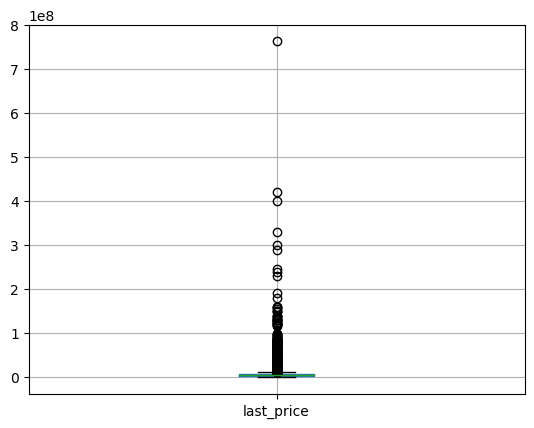

In [39]:
#проверим `last_price` на наличие выбросов и аномалий
data.boxplot(column='last_price')
plt.show()

По диаграмме размаха видно, что относительно медианы и "ящика с усами" есть выбивающиеся значения. Например, значения выше 0.2 (20 млн). Учитывая, что квартиры могут иметь такую стоимость и выше, обработаем значения выше 100 млн, что является элитной недвижимостью.

In [40]:
#обработаем `last_price`
data.query('last_price > 1e+08')['last_price'].count()
data.drop(index=data.query('last_price > 1e+08').index,inplace=True)

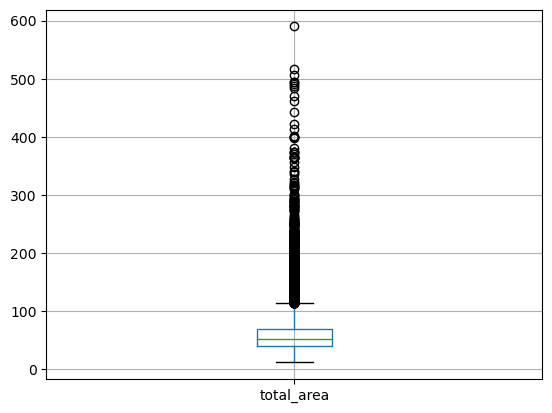

In [41]:
#проверим `total_area` на наличие выбросов и аномалий
data.boxplot(column='total_area')
plt.show()

По диаграмме размаха видно, что относительно медианы и "ящика с усами" есть выбивающиеся значения. Например, значения от 100 кв. м. Учитывая, что некоторые квартиры могут иметь такую площадь и выше, обработаем значения выше 200 кв. м, что является элитной недвижимостью. Квартиры при 200 кв. м. могут стоить до 100 млн, что соотносится с предыдущим пунктом.

In [42]:
#обработаем `total_area`
data.query('total_area > 300')['total_area'].count()
data.drop(index=data.query('total_area > 300').index,inplace=True)

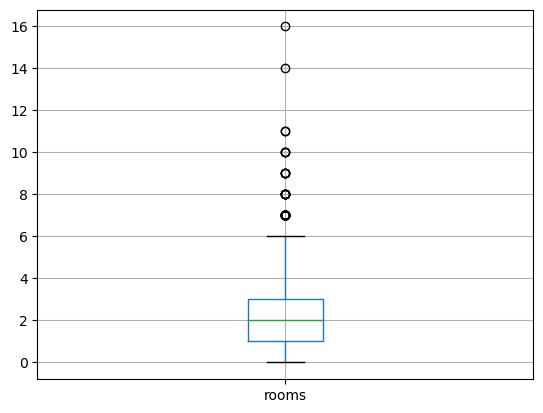

In [43]:
#проверим `rooms` на наличие выбросов и аномалий
data.boxplot(column='rooms')
plt.show()

По диаграмме размаха видно, что относительно медианы и "ящика с усами" есть выбивающиеся значения. Например, суммарное количество комнат свыше 7.

In [44]:
#обработаем `rooms`
data.query('rooms > 7')['rooms'].count()
data.drop(index=data.query('rooms > 7').index,inplace=True)

In [45]:
#проверим `rooms` на наличие квартир с 0 комнат, но которые не квартиры с откр. плтанировкой, ни студии
data.query('rooms == 0 and ~open_plan and ~studio')['rooms'].count()

0

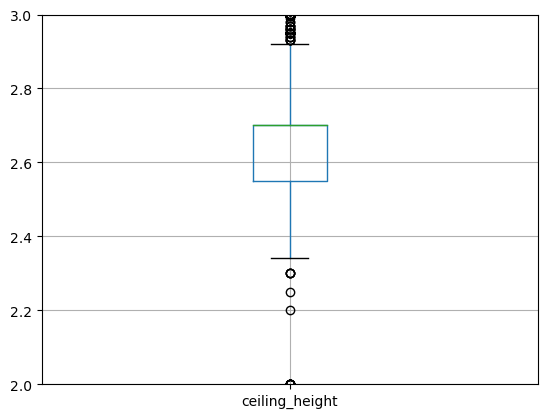

In [46]:
#проверим `ceiling_height` на наличие выбросов и аномалий
data.boxplot(column='ceiling_height')
plt.ylim(2,3)
plt.show()

По диаграмме размаха видно, что относительно медианы и "ящика с усами" есть выбивающиеся значения. Например, значение на уровне 2.00, что ниже минимума высоты потолка в России, а также значения выше 3.00, когда принятый стандарт 2.5-3.2 м.

In [47]:
#обработаем `ceiling_height`
data.query('ceiling_height < 2')['ceiling_height'].count()
data.query('ceiling_height > 4')['ceiling_height'].count()
data.drop(index=data.query('ceiling_height < 2').index,inplace=True)
data.drop(index=data.query('ceiling_height > 4').index,inplace=True)

data.update(data[(data['ceiling_height'] >= 22) & (data['ceiling_height'] <= 32)]['ceiling_height']/10)

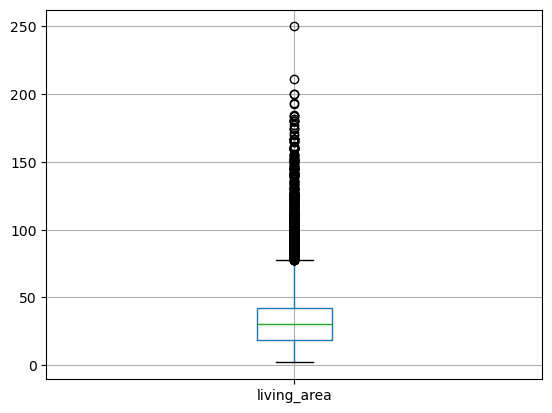

In [48]:
#проверим `living_area` на наличие выбросов и аномалий
data.boxplot(column='living_area')
plt.show()

По диаграмме размаха видно, что относительно медианы и "ящика с усами" есть выбивающиеся значения. Например, значения выше 70 кв. м жилой площади. Учитывая, что у нас есть квартиры до 100 млн и до 200 кв. м, их максимальный объем жилой площади может быть до 150 кв. м. Обработаем значения выше этого.

In [49]:
#обработаем `living_area`
data.query('living_area > 150')['living_area'].count()
data.drop(index=data.query('living_area > 150').index,inplace=True)

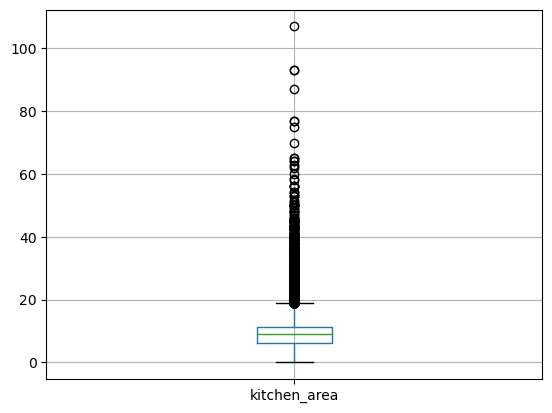

In [50]:
#проверим `kitchen_area` на наличие выбросов и аномалий
data.boxplot(column='kitchen_area')
plt.show()

По диаграмме размаха видно, что относительно медианы и "ящика с усами" есть выбивающиеся значения. Например, значения от 20 кв. м. Обработаем значения выше 40 кв. м, учитывая предыдущие пункты.

In [51]:
#обработаем `kitchen_area`
data.query('kitchen_area > 40')['kitchen_area'].count()
data.drop(index=data.query('kitchen_area > 40').index,inplace=True)

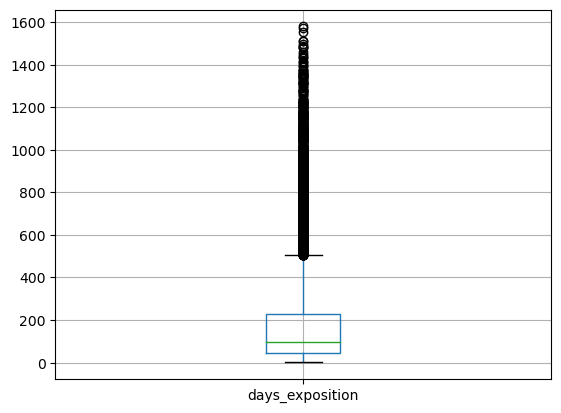

In [52]:
#проверим `days_exposition` на наличие выбросов и аномалий
data.boxplot(column='days_exposition')
plt.show()

По диаграмме размаха видно, что относительно медианы и "ящика с усами" есть выбивающиеся значения. Например, значения выше около 480 дней. Обработаем значения свыше 3-х лет размещения объявления.

In [53]:
#обработаем `days_exposition`
data.query('days_exposition > 365*3')['days_exposition'].count()
data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)

In [54]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23203.000000,2.320300e+04,23203.000000,23203.000000,23203.000000,23203.000000,21344.000000,23203.000000,23203.000000,23203.000000,23203.000000,23203.000000,23203.000000,23203.000000,23203.000000,23203.000000,20107.000000
mean,9.843555,5.953991e+06,58.149587,2.034306,2.695834,10.686161,33.259127,5.906176,9.237776,0.592984,21996.684179,10935.853597,0.459337,165.281300,0.579666,198.346335,171.092903
std,5.663304,5.412202e+06,27.350376,1.000144,0.202715,6.623563,17.669012,4.893182,5.360729,0.958634,16524.160208,9644.454467,0.738162,304.432484,0.874346,305.821753,196.898160
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.500000,2.000000,6.300000,0.000000,9992.000000,2143.500000,0.000000,0.000000,0.000000,0.000000,44.000000
50%,9.000000,4.600000e+06,51.400000,2.000000,2.700000,9.000000,30.000000,4.000000,8.800000,0.000000,21731.000000,11347.000000,0.000000,0.000000,0.000000,0.000000,93.000000
75%,14.000000,6.650000e+06,68.300000,3.000000,2.700000,16.000000,42.000000,8.000000,11.200000,1.000000,34450.000000,15289.500000,1.000000,294.000000,1.000000,385.000000,224.000000
max,50.000000,9.800000e+07,300.000000,7.000000,4.000000,60.000000,150.000000,33.000000,40.000000,5.000000,84853.000000,65952.000000,3.000000,3190.000000,3.000000,1344.000000,1095.000000


**Вывод:**
- удалены значения ниже и выше стандартов (`ceiling_height`, `living_area`) 
- удалены аномально высокие значения (`last_price`, `kitchen_area`, `days_exposition`, `rooms`)
- удалены аномально низкие значения (`last_price`)
- скорректированы целые и дробные числа (`ceiling_height`)

**Промежуточный вывод:**

Предобработка обнаружила следующие проблемы в данных:

- пропущенные значения,
- нарушение стиля заголовков,
- неявные дубликаты,
- аномальные значения, 
- неверный тип данных.

Были проведены следующие элементы предобработки:
- заполнены пропуски нулевыми значениями, официальными стандартами или удалены
- заголовки и данные приведены к нижнему регистру
- предотвращены неявные дубликаты (ё --> е, поселок городского типа --> поселок)
- удалены аномальные значения и значения ниже или выше официальных стандартов
- изменены типы данных

Теперь можно перейти к добавлению новых данных в датафрейм и исследовательскому анализу данных. 

### Добавление новых данных

In [55]:
#цена одного квадратного метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int64')

In [56]:
#день недели публикации объявления
data['exposition_day'] = data['first_day_exposition'].dt.weekday

In [57]:
#месяц публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

In [58]:
#год публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

In [59]:
#тип этажа квартиры
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)

floor_category_grouped = data.groupby('floor_category')['floors_total'].median()
floor_category_grouped

floor_category
другой       10.0
первый        5.0
последний     5.0
Name: floors_total, dtype: float64

In [60]:
#расстояние до центра города в километрах
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('int64')

In [61]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,exposition_day,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482,2,755,NaN,120370,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.63,11,18.6,1,True,...,0,0,0,81.0,82920,1,12,2018,первый,18
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.3,4,True,...,90,2,574,558.0,92785,3,8,2015,другой,13
3,0,64900000,159.00,2015-07-24,3,2.70,14,NaN,9,True,...,84,3,234,424.0,408176,4,7,2015,другой,6
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.4,5,True,...,0,0,0,55.0,95065,0,9,2018,другой,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796,3,381,NaN,72490,1,3,2017,другой,4
23695,14,3100000,59.00,2018-01-15,3,2.50,5,38.0,4,True,...,0,0,0,45.0,52542,0,1,2018,другой,0
23696,18,2500000,56.70,2018-02-11,2,2.70,3,29.7,1,True,...,0,0,0,NaN,44091,6,2,2018,первый,0
23697,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,True,...,173,3,196,602.0,149511,1,3,2017,другой,10


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23203 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23203 non-null  int64         
 1   last_price               23203 non-null  int64         
 2   total_area               23203 non-null  float64       
 3   first_day_exposition     23203 non-null  datetime64[ns]
 4   rooms                    23203 non-null  int64         
 5   ceiling_height           23203 non-null  float64       
 6   floors_total             23203 non-null  int64         
 7   living_area              21344 non-null  float64       
 8   floor                    23203 non-null  int64         
 9   is_apartment             23203 non-null  bool          
 10  studio                   23203 non-null  bool          
 11  open_plan                23203 non-null  bool          
 12  kitchen_area             23203 n

**Вывод:**

В таблицу добавлены 6 новых столбцов на основе имеющихся данных для дальнейшего анализа:
- `price_per_square_meter`

- `exposition_day`

- `exposition_month`

- `exposition_year`

- `floor_category`

- `city_centers_nearest_km`

## Исследовательский анализ данных

In [63]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,exposition_day,exposition_month,exposition_year,city_centers_nearest_km
count,23203.000000,2.320300e+04,23203.000000,23203.000000,23203.000000,23203.000000,21344.000000,23203.000000,23203.000000,23203.000000,...,23203.000000,23203.000000,23203.000000,23203.000000,20107.000000,23203.000000,23203.000000,23203.000000,23203.000000,23203.000000
mean,9.843555,5.953991e+06,58.149587,2.034306,2.695834,10.686161,33.259127,5.906176,9.237776,0.592984,...,0.459337,165.281300,0.579666,198.346335,171.092903,97837.111925,2.572081,6.398052,2017.387838,10.556523
std,5.663304,5.412202e+06,27.350376,1.000144,0.202715,6.623563,17.669012,4.893182,5.360729,0.958634,...,0.738162,304.432484,0.874346,305.821753,196.898160,41579.299150,1.790995,3.488412,1.018467,9.515023
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,7962.000000,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.500000,2.000000,6.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,76388.000000,1.000000,3.000000,2017.000000,2.000000
50%,9.000000,4.600000e+06,51.400000,2.000000,2.700000,9.000000,30.000000,4.000000,8.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,93.000000,94729.000000,3.000000,6.000000,2017.000000,11.000000
75%,14.000000,6.650000e+06,68.300000,3.000000,2.700000,16.000000,42.000000,8.000000,11.200000,1.000000,...,1.000000,294.000000,1.000000,385.000000,224.000000,113568.000000,4.000000,10.000000,2018.000000,15.000000
max,50.000000,9.800000e+07,300.000000,7.000000,4.000000,60.000000,150.000000,33.000000,40.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1095.000000,848484.000000,6.000000,12.000000,2019.000000,65.000000


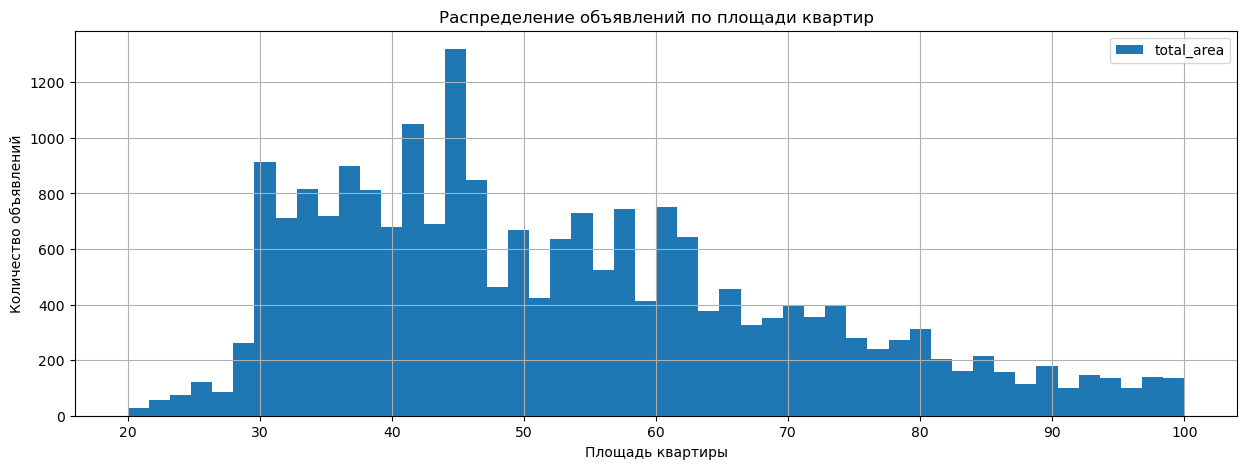

In [64]:
#изучим общую площадь
data.plot(kind='hist', y='total_area', title='Распределение объявлений по площади квартир', bins=50, range=(20, 100), figsize=(15, 5), grid=True)
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество объявлений')
plt.show()

Максимальные значения от 30 до 50 кв. м, пиковые значения приходятся примерно на 32 кв. м и 45 кв. м. Имеются незначительные провалы между пиковыми значениями и в дальнейшем. Возможно, это соотносится с общепринятыми стандартами. 
Однокомнатная квартира должна быть не менее 28 кв. м, двухкомнатная – не менее 44 кв. м, трехкомнатная – не менее 56 кв. м и т.д. 
Нулевых значений нет, значения свыше 100 кв. м убывают, что означает небольшую часть элитной недвижимости и в основном дает нам данные о среднем сегменте.

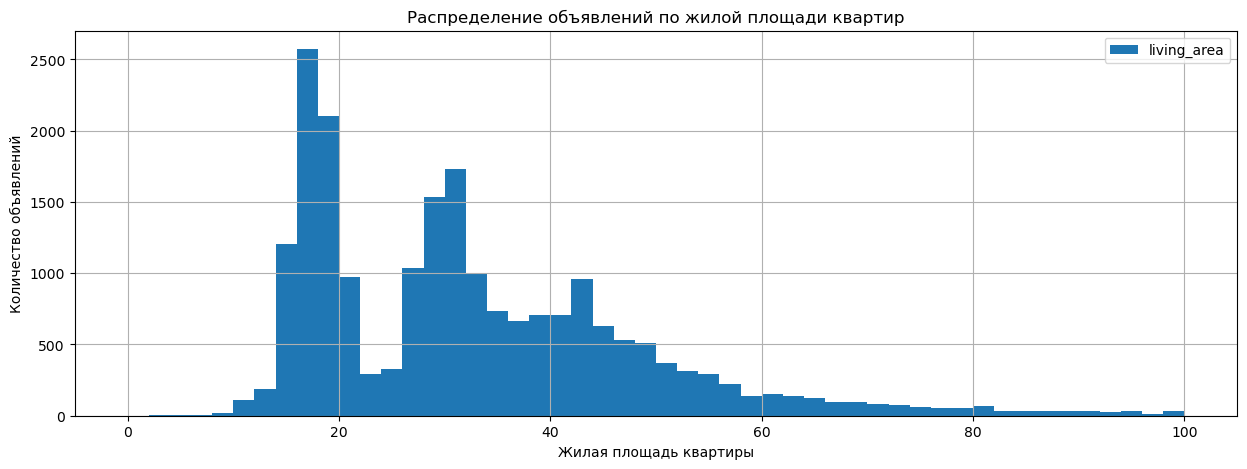

In [65]:
#изучим жилую площадь
data.plot(kind='hist', y='living_area', title='Распределение объявлений по жилой площади квартир', bins=50, range=(0, 100), figsize=(15, 5), grid=True)
plt.xlabel('Жилая площадь квартиры')
plt.ylabel('Количество объявлений')
plt.show()

Максимальное значение – 18 кв. жилой площади, что соответствует стандартным минимальным метражом для проживания одного человека. Второй менее ярко выраженный пик приходится на 30 кв. м. Значительный провал на уровне от 21 до 25 кв. м. Нулевые значения отсутствуют, выбивающиеся высокие значения не преобладают, квартир с жилой площадью выше 80 кв. м небольшое убывающее количество.
Значительный провал на уровне от 21 до 25 кв. м. может быть связан с общепринятыми стандартами метражом жилой площади: от 10 до 21 кв. м – норма для однокомнатной квартиры, от 25 до 30 кв. м - двухкомнатной, от 35 кв. м. - трехкомнатной.

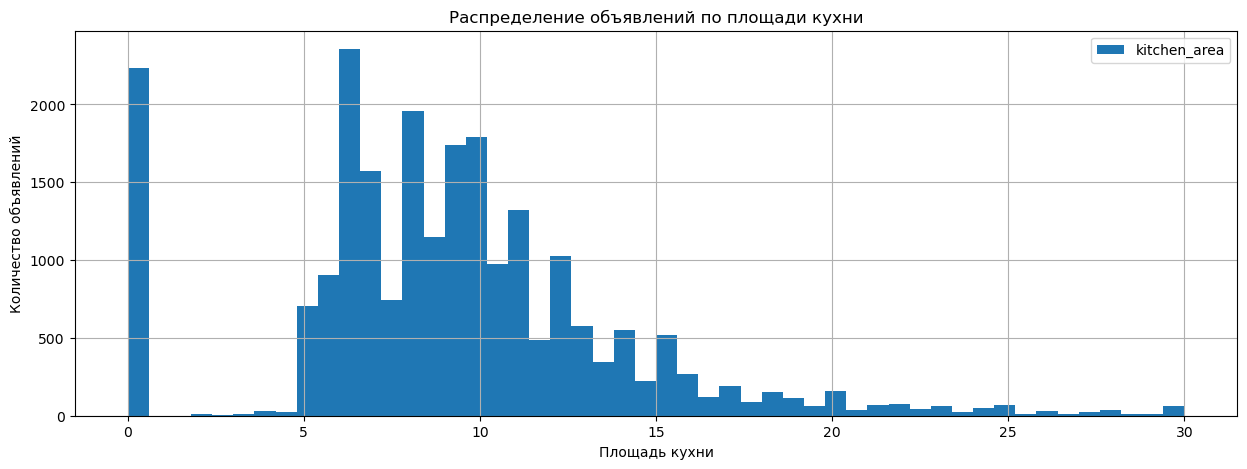

In [66]:
#изучим площадь кухни
data.plot(kind='hist', y='kitchen_area', title='Распределение объявлений по площади кухни', bins=50, range=(0, 30), figsize=(15, 5), grid=True)
plt.xlabel('Площадь кухни')
plt.ylabel('Количество объявлений')
plt.show()

Имеется три максимальных пиковых значения: примерно 7, 10, 12 кв. м. Площади кухни свыше 40 кв. м практически нет. Нулевых значений не имеется. 

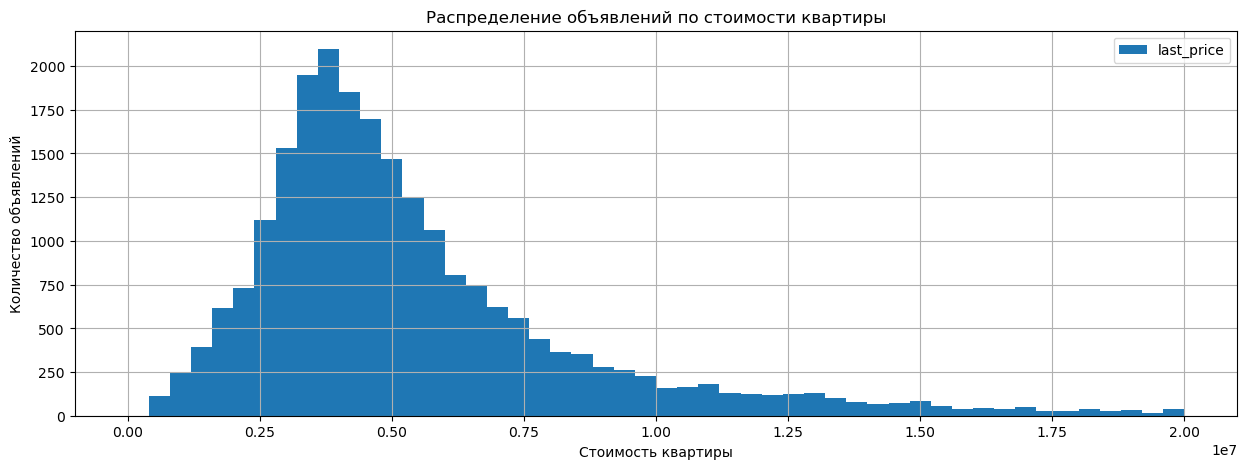

In [67]:
#изучим цену объекта
data.plot(kind='hist', y='last_price', title='Распределение объявлений по стоимости квартиры', bins=50, range=(0, 2e+07), figsize=(15, 5), grid=True)
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количество объявлений')
plt.show()

Пиковое значение достигается при стоимости примерно в 0,35 (3,5 млн). Элитная недвижимость создает череду значений после 0,2, однако не мешающую анализу. Нулевых значений нет.

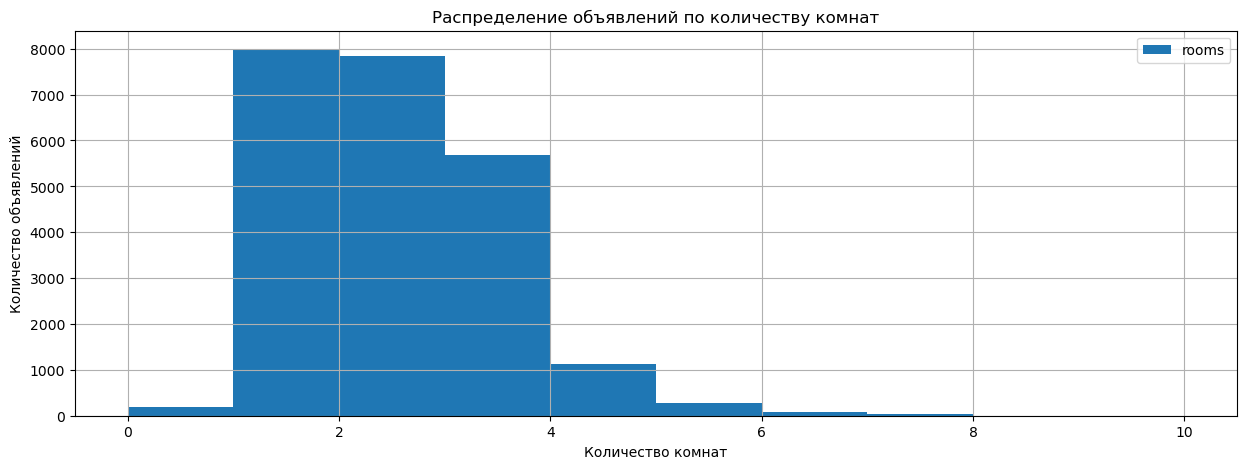

In [68]:
#изучим количество комнат
data.plot(kind='hist', y='rooms', title='Распределение объявлений по количеству комнат', bins=10, range=(0, 10), figsize=(15, 5), grid=True)
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

Нулевых значений нет. Представлено пиковое значение, 2 комнаты, а также практически идентичное первому по количестве объявлений второе максимальное значение в 3 комнаты. Максимальное число комнат в квартире – 7. Данные после пяти комнат относятся к неджвижимости выше среднего сегмента.

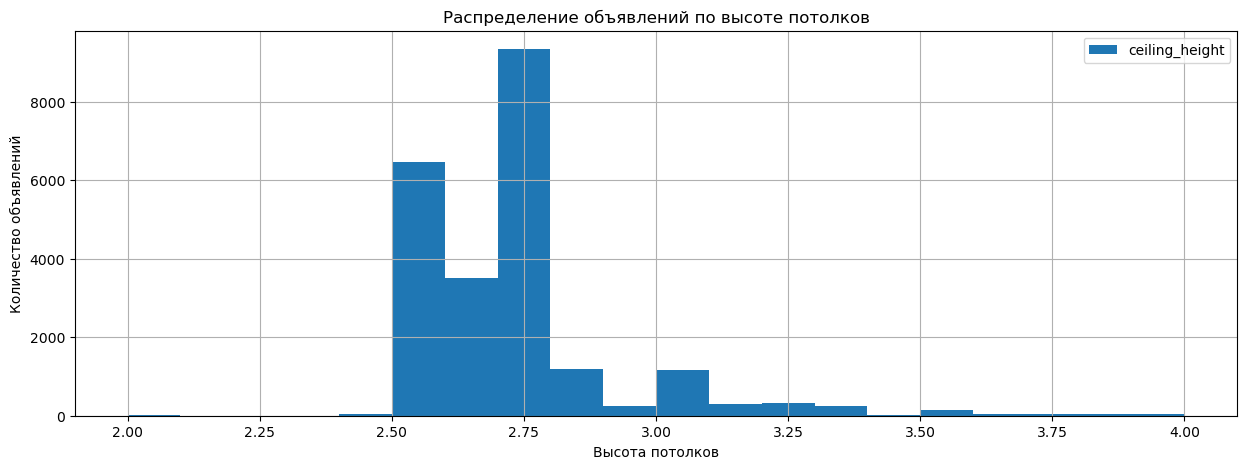

In [69]:
#изучим высоту потолков
data.plot(kind='hist', y='ceiling_height', title='Распределение объявлений по высоте потолков', bins=20, range=(2, 4), figsize=(15, 5), grid=True)
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

Максимальная высота потолка достигает чуть больше 3 м, что является стандартом. Потолки ниже 2 м и выше 4 м были удалены, что не создает выбросов на гистограмме.

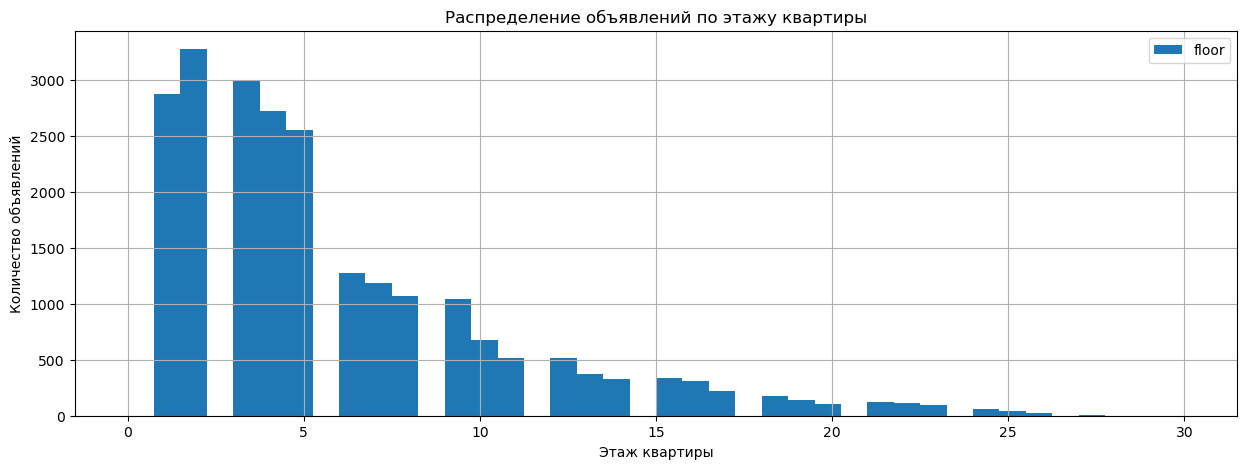

In [70]:
#изучим этаж квартиры
data.plot(kind='hist', y='floor', title='Распределение объявлений по этажу квартиры', bins=40, range=(0, 30), figsize=(15, 5), grid=True)
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество объявлений')
plt.show()

Наиболее пользующимися спросом этажами являются этажи с первого по пятый включительно (в особенности примерно 2 и 4 этажи). Нулевых значений нет, максимальная этажность квартиры характерна для новостроек и премиальной недвижимости и может доходить до примерно 27 этажа.

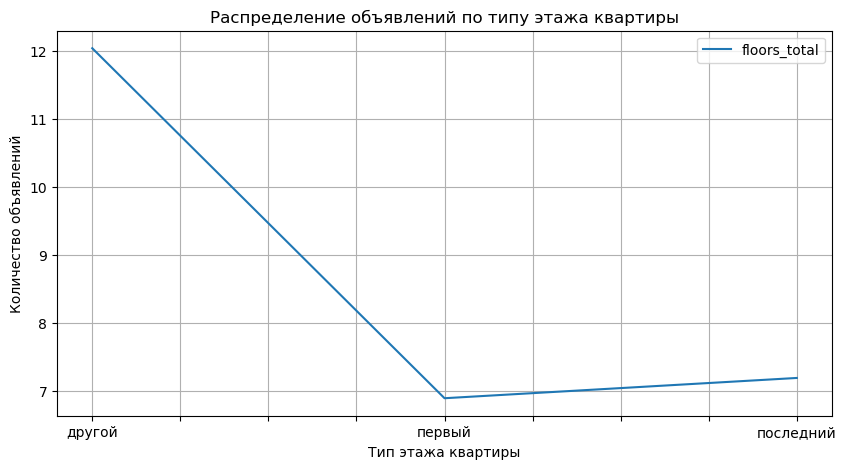

In [71]:
#изучим тип этажа квартиры
data.pivot_table(index='floor_category', values='floors_total').plot(title='Распределение объявлений по типу этажа квартиры', figsize=(10, 5), grid=True, legend=True)
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Количество объявлений')
plt.show()

По большинству объявлений продаются квартиры с типом этажа "другой" (любой, кроме первого и последнего), около 15500 размещений. Первый и последний этажи имеют примерно идентичную картину: по первому этажу имеется около 2500 объявлений, тогда как по последнему чуть больше – 3000 объявлений.

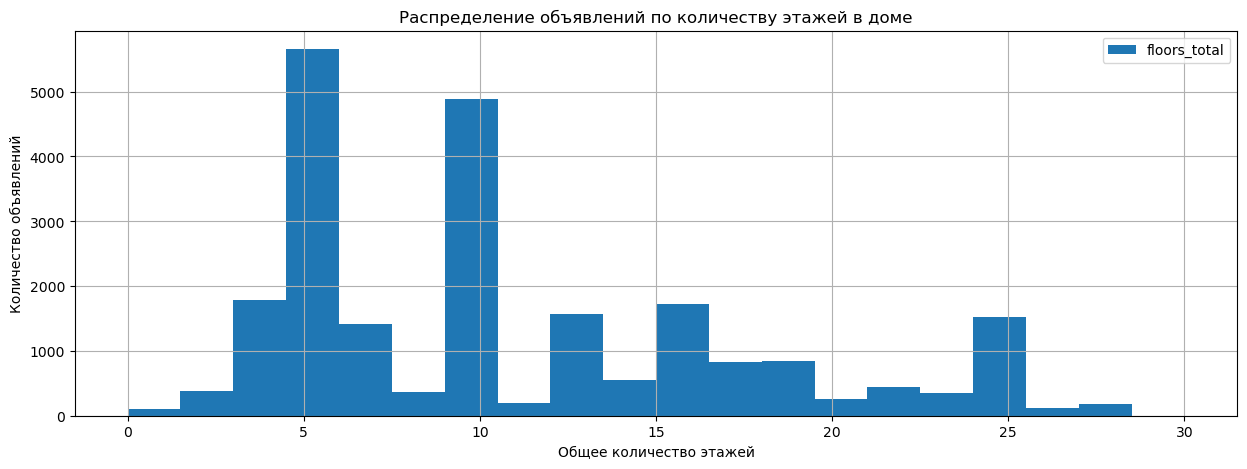

In [72]:
#изучим общее количество этажей в доме
data.plot(kind='hist', y='floors_total', title='Распределение объявлений по количеству этажей в доме', bins=20, range=(0, 30), figsize=(15, 5), grid=True)
plt.xlabel('Общее количество этажей')
plt.ylabel('Количество объявлений')
plt.show()

Преобладают значения в 5-6, а также 9-10 этажей. Данный вид застройки представляет собой "сталинки" и "хрущевки". Принята этажность в 5 или 9 этажей, что создает провал при 7, 8 и 12, 13 этажах. Значения выше – современные новостройки по типу небоскребов. Нулевых значений нет.

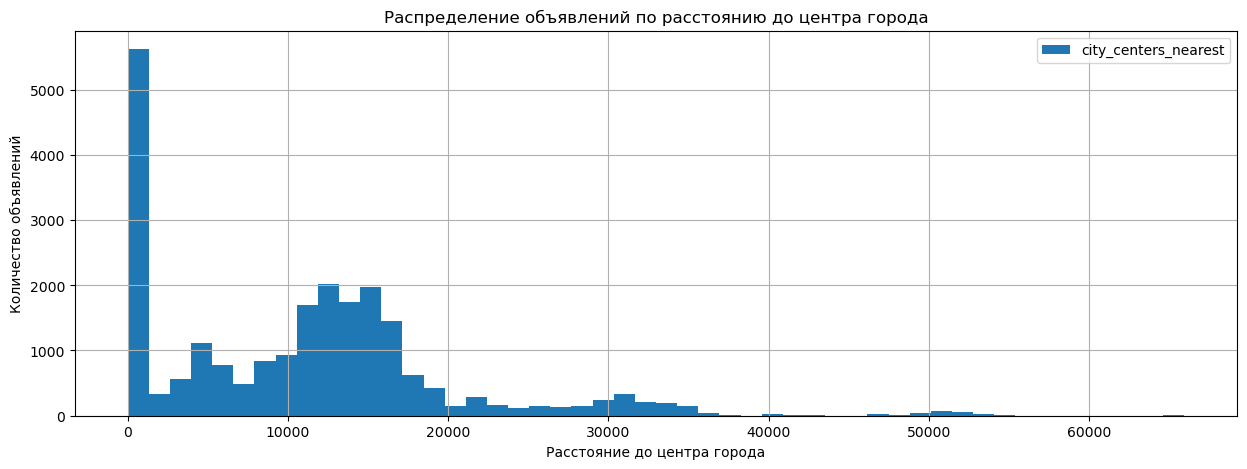

In [73]:
#изучим расстояние до центра города в метрах
data.plot(kind='hist', y='city_centers_nearest', title='Распределение объявлений по расстоянию до центра города', bins=50, figsize=(15, 5), grid=True)
plt.xlabel('Расстояние до центра города')
plt.ylabel('Количество объявлений')
plt.show()

Пиковое значение наблюдается у объявлений с минимальным расстоянием до центра города: в пределах 1000-2000 м. Также имеется небольшой пик между 10000 и 15000 м. Таким образом, чаше всего квартиры находятся либо практически в центре города или же требуется использовать транспорт, чтобы добраться до центра от окраины города. Значений свыше 30 км имеют нисходящую тенденцию.

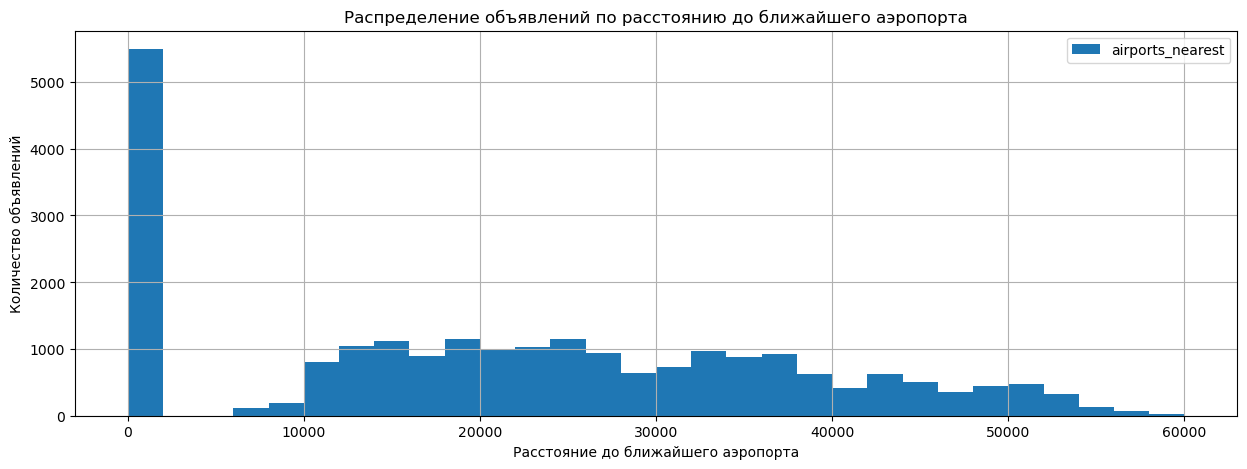

In [74]:
#изучим расстояние до ближайшего аэропорта
data.plot(kind='hist', y='airports_nearest', title='Распределение объявлений по расстоянию до ближайшего аэропорта', bins=30, figsize=(15, 5), range=(0, 60000), grid=True)
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Количество объявлений')
plt.show()

В основном квартиры расположены в ближайшем доступе к аэропорту (до 1000-2000 м). Также есть небольшие пики в районе 14-16000 м, 18-20000 м и 26-28000 м. После 50000 м значение квартир с высоким расстоянием до аэропорта убывают. 

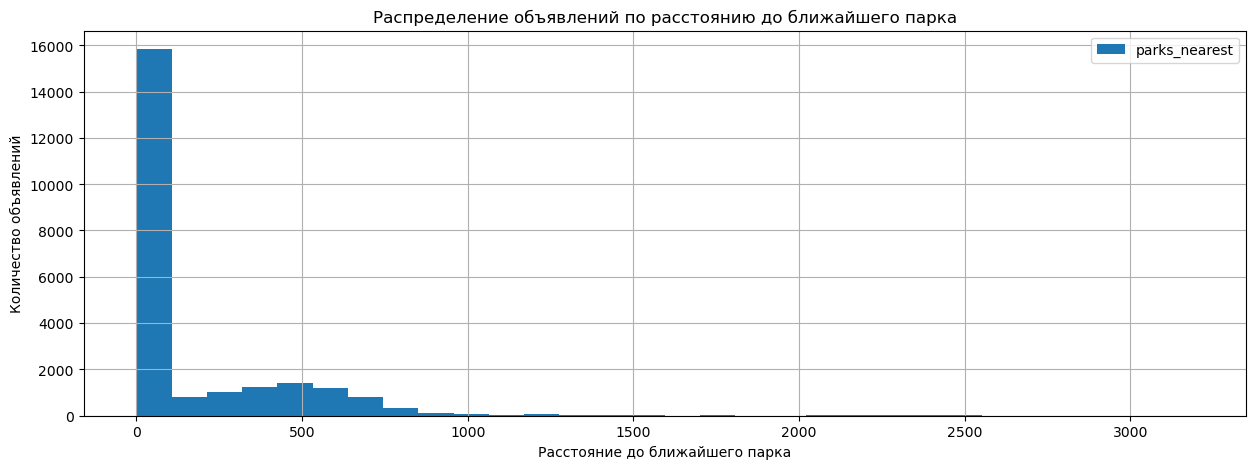

In [75]:
#изучим расстояние до ближайшего парка
data.plot(kind='hist', y='parks_nearest', title='Распределение объявлений по расстоянию до ближайшего парка', bins=30, figsize=(15, 5), grid=True)
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество объявлений')
plt.show()

Большинство квартир находится в свободном доступе к ближайшим паркам (до 200 м). Также много объявлений, где ближайший парк расположен в пределах 500 м. После 500 м количество квартир с более отдаленными по расстоянию парками снижается.

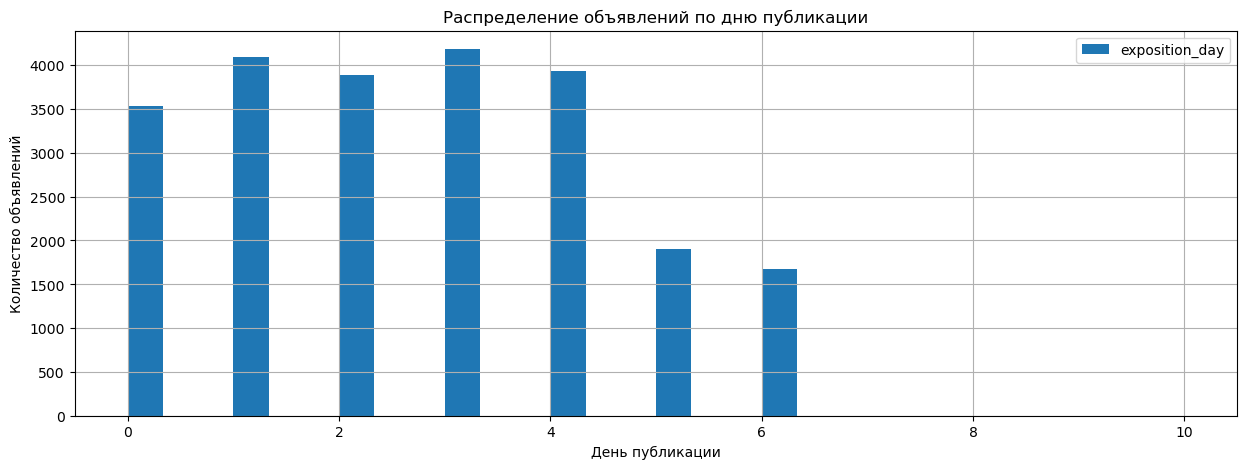

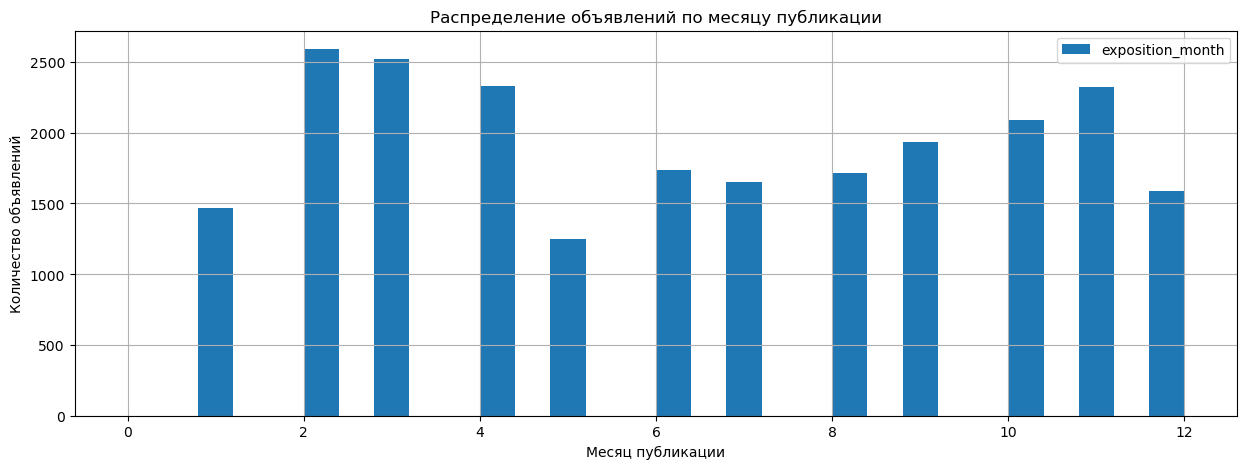

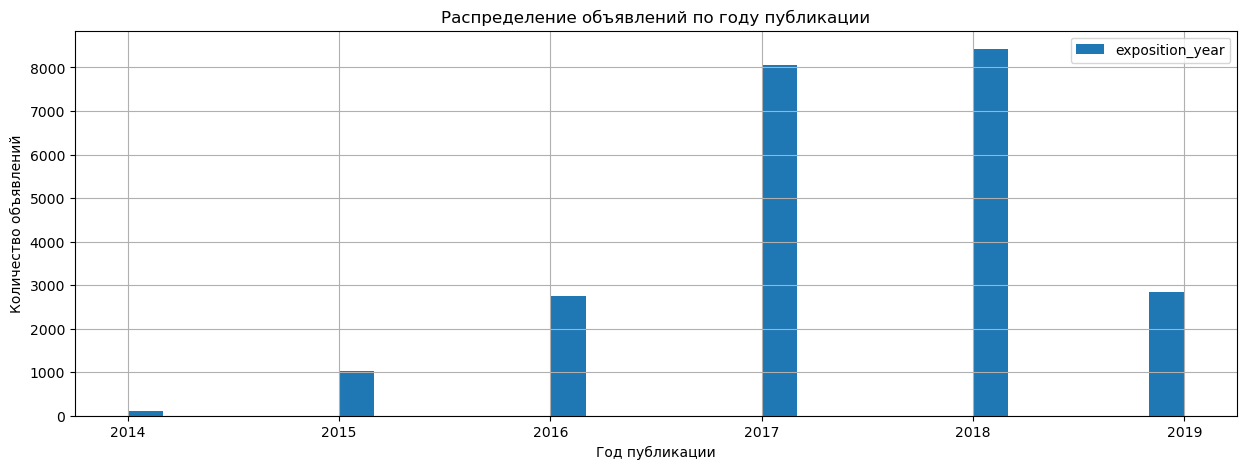

In [76]:
#изучим день, месяц и год публикации объявления
data.plot(kind='hist', y='exposition_day', title='Распределение объявлений по дню публикации', bins=30, range=(0, 10), figsize=(15, 5), grid=True)
plt.xlabel('День публикации')
plt.ylabel('Количество объявлений')
plt.show()

data.plot(kind='hist', y='exposition_month', title='Распределение объявлений по месяцу публикации', bins=30, range=(0, 12), figsize=(15, 5), grid=True)
plt.xlabel('Месяц публикации')
plt.ylabel('Количество объявлений')
plt.show()

data.plot(kind='hist', y='exposition_year', title='Распределение объявлений по году публикации', bins=30, figsize=(15, 5), grid=True)
plt.xlabel('Год публикации')
plt.ylabel('Количество объявлений')
plt.show()

В большинстве случаев объявления размещали во вторник и четверг, а меньше всего в выходные дни. 
Что касается месяца, то чаще всего публиковали объявления в первом квартале года: феврале и марте, а также в равных долях в апреле и ноябре. Можно предположить, что это связано с начало летнего и зимнего сезонов, когда туристы часто посещают город и его окрестности.
Больше всего объявлений было размещено в 2017 и 2018 годах, когда соответственно спрос на недвижимость был максимально высоким.

## Проверка гипотез

### Длительность размещения объявлений

Первая гипотеза предполагает, что в среднем поиск покупателя квартиры занимает от трех до шести месяцев. Редко, но встречаются отдельные прецеденты с более быстрой или низкой продажей в зависимости от стоимости жилья, спроса на него других покупателей, населенного пункта и влияния других параметров.

In [77]:
#найдем среднее и медианное значения
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

171.09290296911524
93.0


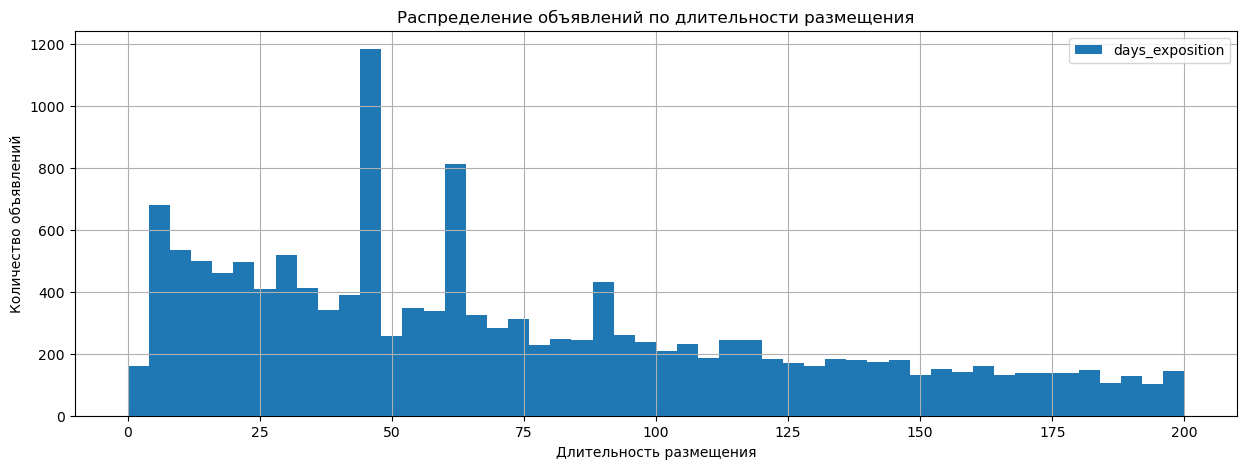

In [78]:
data.plot(kind='hist', y='days_exposition', title='Распределение объявлений по длительности размещения', bins=50, range=(0, 200), figsize=(15, 5), grid=True)
plt.xlabel('Длительность размещения')
plt.ylabel('Количество объявлений')
plt.show()

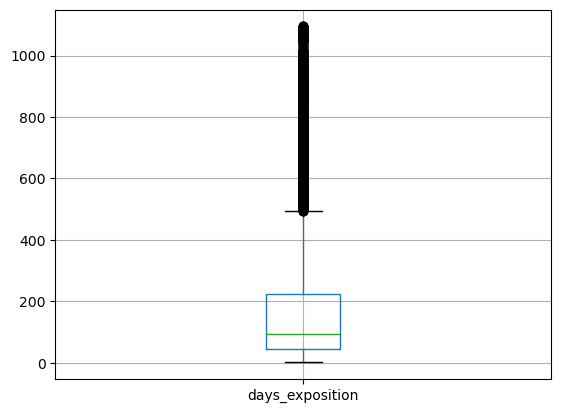

In [79]:
#определим длительные и быстрые продажи
data.boxplot(column='days_exposition')
plt.show()

In [80]:
data['days_exposition'].describe()

count    20107.000000
mean       171.092903
std        196.898160
min          1.000000
25%         44.000000
50%         93.000000
75%        224.000000
max       1095.000000
Name: days_exposition, dtype: float64

**Вывод**:

Гипотеза частично подтвердилась. 

Среднее время продажи квартиры составляет 175 дней, тогда как медианное значение в 2 раза меньше и составляет 99 день. Такая существенная разница обусловлена наличием "длинного хвоста", создаваемого многолетними объявлениями. Можно предположить, что они давно не актуальны и их просто не сняли. 

Следовательно, продажа квартиры в среднем (по медиане) занимает три месяца. 

Согласно диаграмме размаха **быстрыми** продажи будут продажи выше первого квартиля – 44 дня. **Длительными** являются продажи выше третьего квартиля – 232 дня.

### Факторы, больше всего влияющие на стоимость квартиры

Вторая гипотеза предполагает, что на стоимость квартиры влияют все имеющиеся факторы в различной степени. Наиболее сильно может быть выражено влияние общей площади и количества комнат.

            total_area
last_price            
430000           42.20
440000           40.00
450000           40.25
470000           41.00
480000           32.00
...                ...
85000000        145.70
86738800        190.00
90000000        225.00
95000000        190.00
98000000        155.00

[2833 rows x 1 columns]


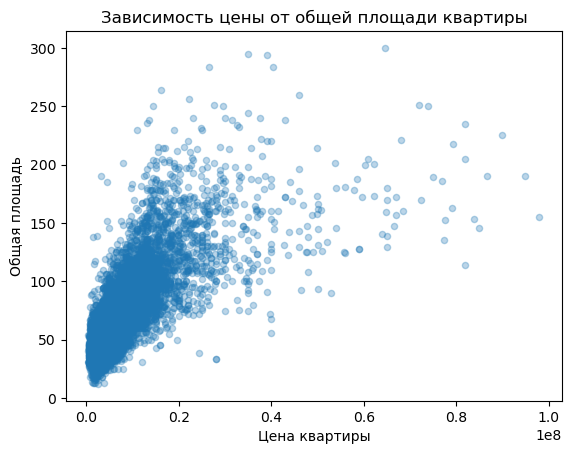

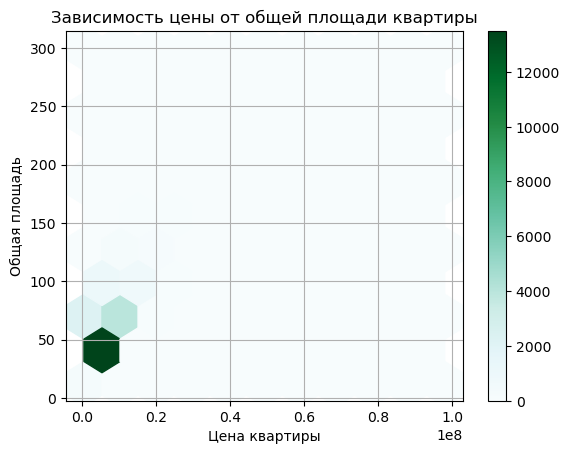

In [81]:
#изучим зависимость цены и общей площади квартиры
price_total_area = data.pivot_table(index='last_price', values='total_area', aggfunc='median')
print(price_total_area)

data.plot(kind='scatter', y='total_area', x='last_price', alpha=0.3, title='Зависимость цены от общей площади квартиры')
plt.xlabel('Цена квартиры')
plt.ylabel('Общая площадь')
plt.show()

data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=10, sharex=False, grid=True, title='Зависимость цены от общей площади квартиры')
plt.xlabel('Цена квартиры')
plt.ylabel('Общая площадь')
plt.show()

In [82]:
#найдем корреляцию Пирсона
data['last_price'].corr(data['total_area'])

0.7393143509395502

Коэффициент Пирсона имеет значение 0,74, что говорит о достаточно сильной корреляции, близкой к единице, между ценой квартиры и ее общей площадью. 

Диаграмма рассеяния демонстрирует довольно устойчивую линейную связь между двумя параметрами, корреляцию и положительную взаимозависимость. То есть чем больше стоимость объекта, тем выше его площадь и наоборот. Значения концентрируются в большинстве своем в промежутке от 20 до 180 кв. м по общей площади, а также до 0,2 (20 млн). 

Следующий график обозначает, что больше всего объявлений (12000) у квартир с общей площадью от 40 до 100 кв. м и стоимостью квартиры до 10 млн.

            living_area
last_price             
430000            16.00
450000            23.00
470000            30.00
480000            16.00
490000            17.00
...                 ...
83820000          82.00
85000000          87.23
86738800          89.70
90000000         134.00
95000000         130.00

[2552 rows x 1 columns]


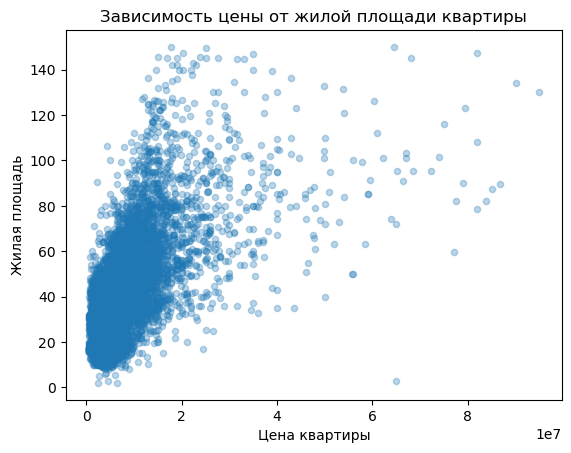

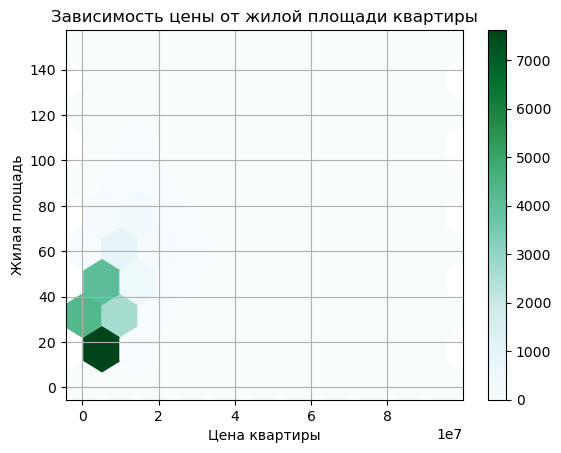

In [83]:
#изучим зависимость цены и жилой площади
price_living_area = data.pivot_table(index='last_price', values='living_area', aggfunc='median')
print(price_living_area)

data.plot(kind='scatter', y='living_area', x='last_price', alpha=0.3, title='Зависимость цены от жилой площади квартиры')
plt.xlabel('Цена квартиры')
plt.ylabel('Жилая площадь')
plt.show()

data.plot(x='last_price', y='living_area', kind='hexbin', gridsize=10, sharex=False, grid=True, title='Зависимость цены от жилой площади квартиры')
plt.xlabel('Цена квартиры')
plt.ylabel('Жилая площадь')
plt.show()

In [84]:
#найдем корреляцию Пирсона
data['last_price'].corr(data['living_area'])

0.6413636937287885

Коэффициент Пирсона имеет значение 0,64, что говорит о достаточной корреляции, близкой к единице, между ценой квартиры и ее жилой площадью. 

Диаграмма рассеяния демонстрирует устойчивую линейную связь между двумя параметрами, корреляцию и положительную взаимозависимость, как и в случае с общей площадью квартиры. То есть чем больше стоимость объекта, тем выше его жилая площадь и наоборот. Значения концентрируются в большинстве своем в промежутке от 10 и до 100 кв. м по жилой площади, а также до 0,2 (20 млн). 

Следующий график обозначает, что больше всего объявлений (больше 6000) у квартир с жилой площадью от 20 до 50 кв. м и стоимостью квартиры до 10 млн.

            kitchen_area
last_price              
430000              3.00
440000              0.00
450000              5.65
470000              7.50
480000              0.00
...                  ...
85000000           20.31
86738800           25.86
90000000           19.50
95000000           25.00
98000000            0.00

[2833 rows x 1 columns]


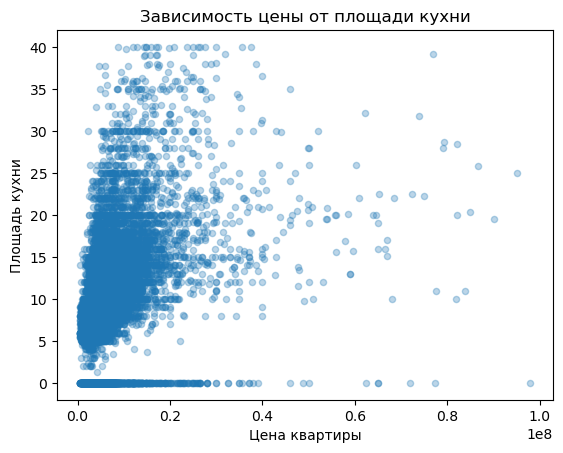

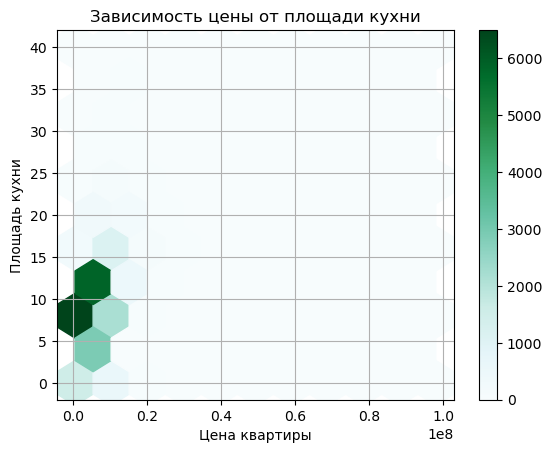

In [85]:
#изучим зависимость цены и площади кухни
price_kitchen_area = data.pivot_table(index='last_price', values='kitchen_area', aggfunc='median')
print(price_kitchen_area)

data.plot(kind='scatter', y='kitchen_area', x='last_price', alpha=0.3, title='Зависимость цены от площади кухни')
plt.xlabel('Цена квартиры')
plt.ylabel('Площадь кухни')
plt.show()

data.plot(x='last_price', y='kitchen_area', kind='hexbin', gridsize=10, sharex=False, grid=True, title='Зависимость цены от площади кухни')
plt.xlabel('Цена квартиры')
plt.ylabel('Площадь кухни')
plt.show()

In [86]:
#найдем корреляцию Пирсона
data['last_price'].corr(data['kitchen_area'])

0.42817872580632244

Коэффициент Пирсона имеет значение 0,53, что показывает убывающую тенденцию по сравнению с `total_area` и `living_area`, а также что продолжает говорить о достаточной корреляции, приближающейся к единице, между ценой квартиры и площадью ее кухни. 

Диаграмма рассеяния демонстрирует менее устойчивую линейную связь между двумя параметрами, но по-прежнему созраняется корреляция и положительная взаимозависимость. Чем больше стоимость объекта, тем выше его площадь его кухни и наоборот. Значения концентрируются в большинстве своем в промежутке от 5 до 25 кв. м по площади кухни, а также до 0,2 (20 млн). 

Следующий график обозначает, что больше всего объявлений (больше 10000) у квартир с площадью кухни от 6 до 13 кв. м и стоимостью квартиры до 10 млн.

            rooms
last_price       
430000        1.5
440000        1.0
450000        2.0
470000        1.0
480000        1.0
...           ...
85000000      3.0
86738800      5.0
90000000      6.0
95000000      5.0
98000000      3.0

[2833 rows x 1 columns]


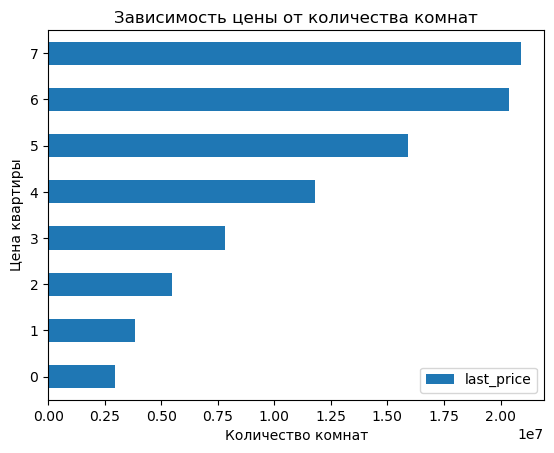

In [87]:
#изучим зависимость цены и количества комнат
price_rooms = data.pivot_table(index='last_price', values='rooms', aggfunc='median')
print(price_rooms)

data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='barh', title='Зависимость цены от количества комнат' )
plt.xlabel('Количество комнат')
plt.ylabel('Цена квартиры')
plt.show()

In [88]:
#найдем корреляцию Пирсона
data['last_price'].corr(data['rooms'])

0.44818340584875543

Коэффициент Пирсона имеет значение 0,45, что показывает убывающую тенденцию по сравнению с `total_area`, `living_area` и `kitchen_area`, а также что продолжает демонстрировать имеющуюся корреляции, которая приближается к единице, между ценой квартиры и количество ее комнат. 

Столбчатая диаграмма показывает, что дороже всего обходятся 9 и 19 этажи. Присутсвует определенная корреляция, которая однако с 10 этажа снизилась и нарушила общую линейность. 

Диаграмма рассеяния показывает корреляцию и положительная взаимозависимость между двумя параметрами. Чем больше стоимость объекта, тем выше количество комнат и наоборот. Чем больше комнат в квартире, тем, очевиднее, она дороже. Значения не имеют единой концентрации, но можно установить, что для однокомнатных квартир стоимость варьируется до 17 млн, для двухкомнатных – до 28 млн, трехкомнатных – до 40 млн и по возрастающей.

Следующий график обозначает, что больше всего объявлений (больше 10000) у квартир с количеством комнат от 2 до 4 и стоимостью квартиры до 10 млн.

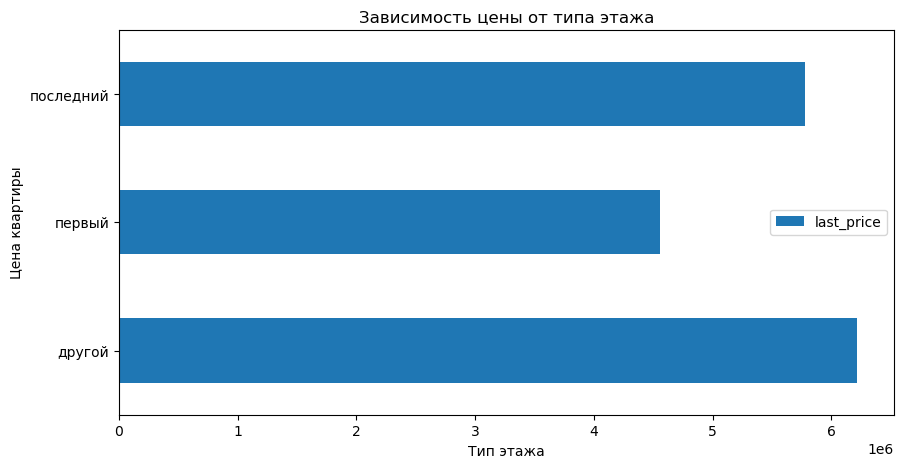

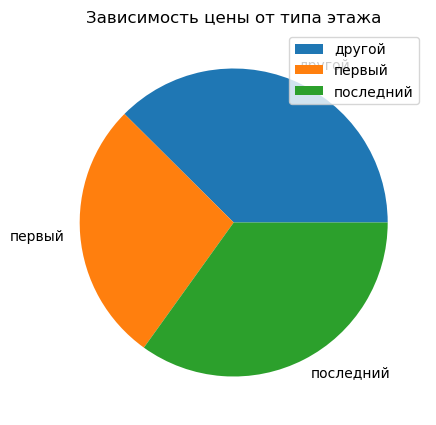

In [89]:
#изучим зависимость цены и типа этажа квартиры
data.pivot_table(index='floor_category',values='last_price').plot(y='last_price', kind='barh', figsize=(10, 5), title='Зависимость цены от типа этажа' )
plt.xlabel('Тип этажа')
plt.ylabel('Цена квартиры')
plt.show()

data.pivot_table(index='floor_category',values='last_price').plot(y='last_price', kind='pie', figsize=(10, 5), label='', title='Зависимость цены от типа этажа')
plt.show()

График показывает, что наибольшая стоимость имеется у категории этажа "другой", далее она снижается до категории "первый" этаж и поднимается до категории "последний" этаж.

Круговая диаграмма обозначает, что выше всего стоимость у "других" этажей, как и количество их предложений, а категории "первый" и "последний" этажи практичеи равнозначны.

            exposition_day  exposition_month
last_price                                  
430000                 0.5               5.0
440000                 1.0               7.0
450000                 2.5               7.0
470000                 6.0               2.0
480000                 6.0               1.0
...                    ...               ...
85000000               3.0               8.0
86738800               3.0               9.0
90000000               6.0               6.0
95000000               6.0               2.0
98000000               5.0              12.0

[2833 rows x 2 columns]


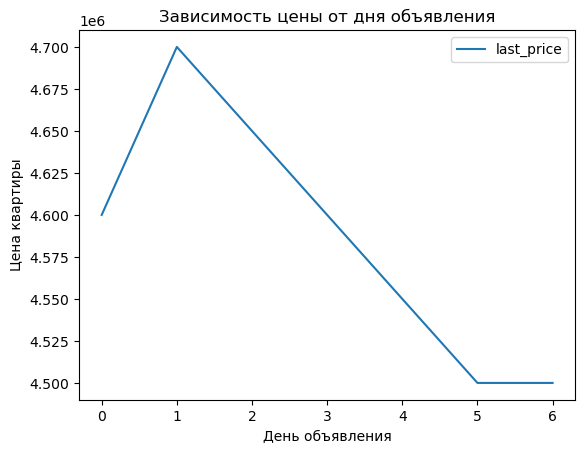

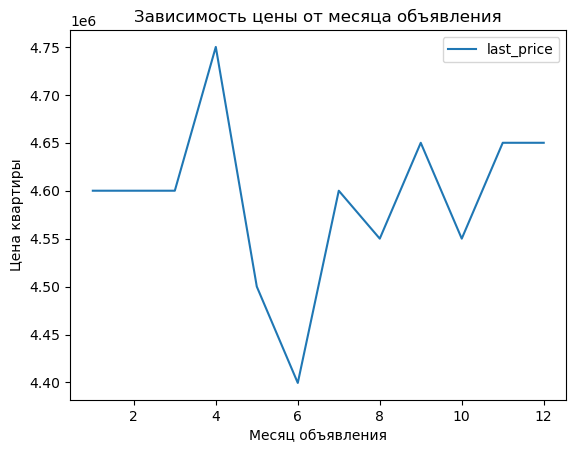

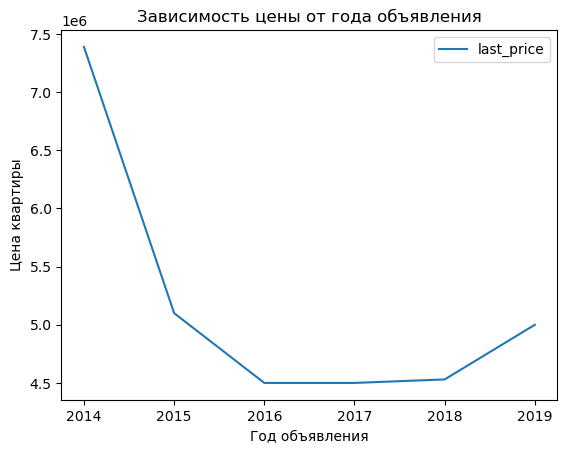

In [90]:
#изучим зависимость цены и даты размещения объявления
price_rooms = data.pivot_table(index='last_price', values=['exposition_day', 'exposition_month'], aggfunc='median')
print(price_rooms)

data.pivot_table(index='exposition_day',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='Зависимость цены от дня объявления')
plt.xlabel('День объявления')
plt.ylabel('Цена квартиры')
plt.show()

data.pivot_table(index='exposition_month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='Зависимость цены от месяца объявления')
plt.xlabel('Месяц объявления')
plt.ylabel('Цена квартиры')
plt.show()

data.pivot_table(index='exposition_year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='Зависимость цены от года объявления')
plt.xlabel('Год объявления')
plt.ylabel('Цена квартиры')
plt.show()

In [91]:
#найдем корреляцию Пирсона
print(data['last_price'].corr(data['exposition_day']))
print(data['last_price'].corr(data['exposition_month']))
print(data['last_price'].corr(data['exposition_year']))

-0.00607399380958464
0.00843293462863061
-0.04388270259147736


Коэффициент Пирсона для дня публикации имеет отрицательное нулевое значение -0,009, что свидетельствует об отсуствии взаимозависимости вообще.
Коэффициент Пирсона для месяца публикации имеет нулевое значение 0,005, что выше, чем в случае со днем публикации, но также недостаточно, чтобы говорить о какой-либо взаимозависимости.
Коэффициент Пирсона для года публикации имеет отрицательное значение -0,03, что свидетельствует об отсуствии взаимозависимости вообще.

График дня публикации показывает, что чаше всего объявления о квартирах со стоимостью выше размещаются в первый день месяца и далее по убывающей траектории.
График месяца публикации демонстрирует, что дороже всего квартиры продаются весной и зимой перед летним и зимнем сезонами соответственно.
На графике года публикации видно, что в 2014 году квартиры продавались по большей стоимости и что только в 2019 году график приобрел возрастающую тенденцию. Это может быть связано со многими внешними обстоятельствами, как объем рынка недвижимости, экономическая и политическая ситуация в стране, международная составляющая и т.д.

Однако, данная корреляция не видится надежной, чтобы считать параметр "дата публикации" как фактор, влияющий на цену квартиры.

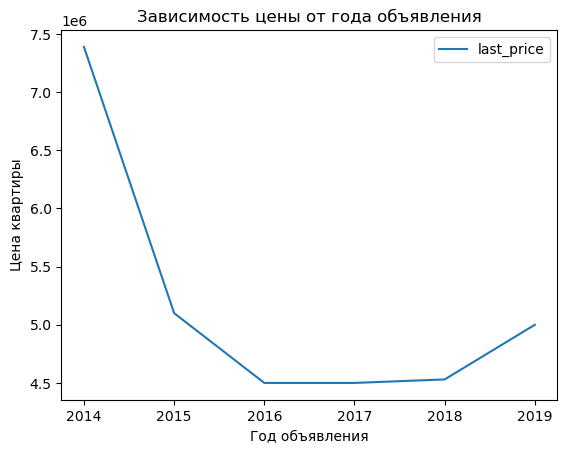

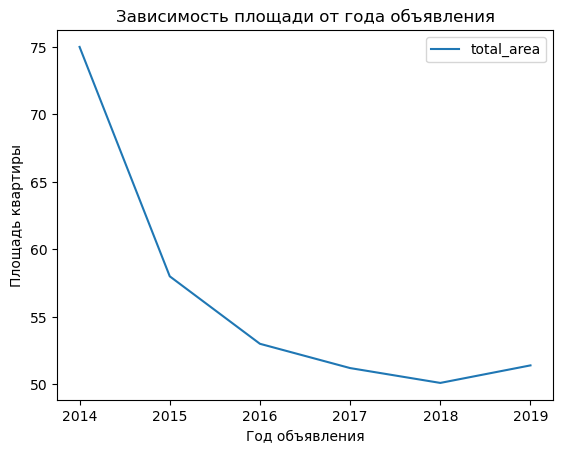

In [92]:
#изучим динамику цены и общей площади квартир от даты размещения объявления
data.pivot_table(index='exposition_year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='Зависимость цены от года объявления')
plt.xlabel('Год объявления')
plt.ylabel('Цена квартиры')
plt.show()

data.pivot_table(index='exposition_year',values='total_area',aggfunc='median').plot(y='total_area', kind='line', title='Зависимость площади от года объявления')
plt.xlabel('Год объявления')
plt.ylabel('Площадь квартиры')
plt.show()

Согласно второму графику, с 2014 года начала снижаться общая площадь продаваемых квартир. С 2019 года отражается ее восстановление. Следовательно, цена квартиры на первом графике снижается с 2014 года, т.к. люди стали чаще покупать квартиры с меньшей площадью, которые и стоят ниже. Корреляции между ценой квартиры и годом размещенного объявления не наблюдается.

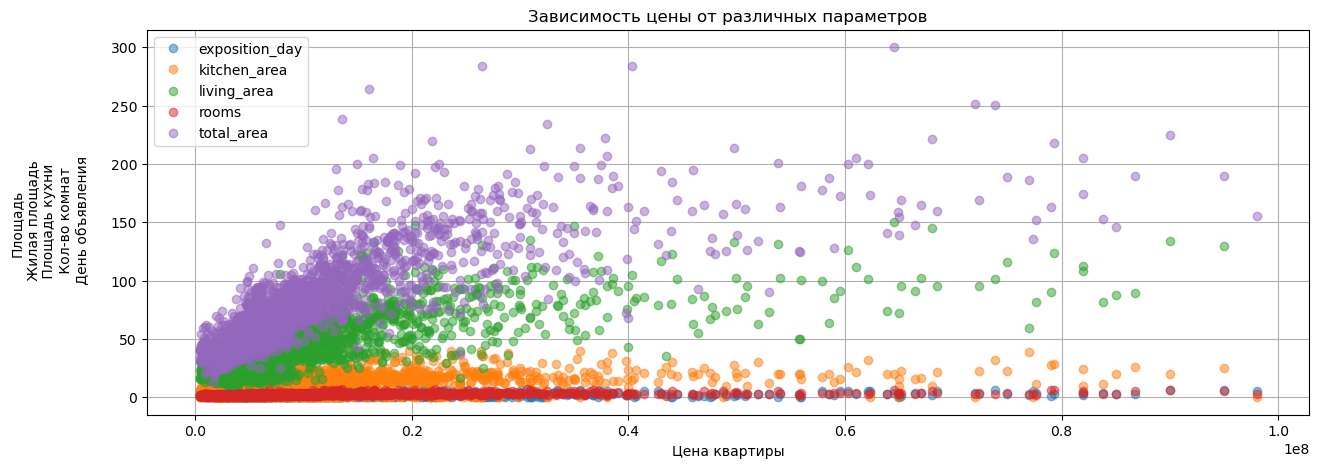

In [93]:
#соотнесем все параметры и цену
(data
    .pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area', 'rooms', 'exposition_day'])
    .plot(style='o', figsize=(15, 5), grid=True, alpha=0.5, title='Зависимость цены от различных параметров')
)
plt.xlabel('Цена квартиры')
plt.ylabel('Площадь\n Жилая площадь\n Площадь кухни\n Кол-во комнат\n День объявления\n')
plt.show()

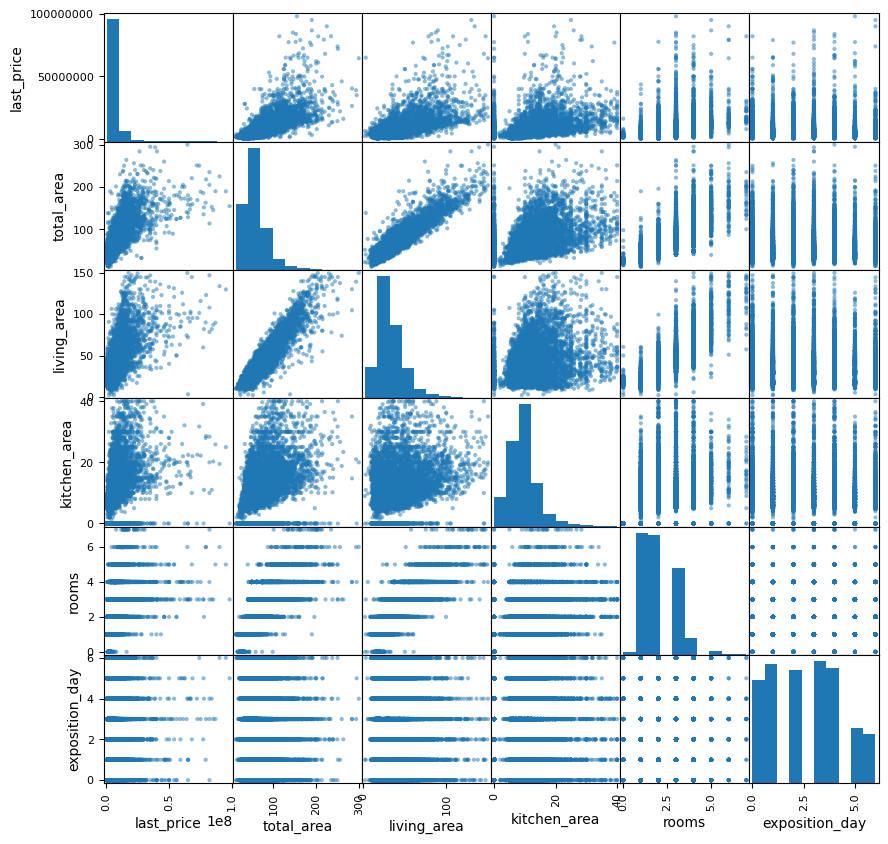

In [94]:
#соотнесем все значения попарными диаграммами рассеяния
data_scatter = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'exposition_day']]
pd.plotting.scatter_matrix(data_scatter, figsize=(10, 10))
plt.show()

**Вывод:**

Гипотеза частично подтвердилась. 

Большинство факторов в разном соотношении влияют на стоимость объекта, помимо даты размещения объявления, которая демонстрирует лишь состояние рынка недвижимости, пики и снижения стоимости жилья.

Зависимость от ценой и различными параметрами имеет нисходящую тенденцию от общей площади квартиры до даты размещения объявления. Так взаимозависимость проявляется следующим образом:

- `last price` и **`total_area`** - 74%

- `last price` и **`living area`** - 64%

- `last price` и **`kitchen_area`** - 53%

- `last price` и **`rooms`** - 45%

Цена объекта наибольшим образом зависит от первых четырех параметров в убывающем порядке, а также не имеет взаимозависимости с типом этажа и датой публикации объявления. 

### Средняя цена одного квадратного метра

Третья гипотеза предполагает, что в разных городах стоимость одного кв. метра будет разниться. Предположительно, чем ближе к центру города, тем дороже кв. метр. В самом центре стоимость квартир будет наиболее высокой по сравнению с другими населенными пунктами.

In [95]:
#найдем самые популярные по количеству объявлений населенные пункты
top_locality = data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
top_locality.columns=['number_of_advertisements']
top_locality

,number_of_advertisements
locality_name,
санкт-петербург,15301
посёлок мурино,551
посёлок шушары,438
всеволожск,395
пушкин,357
колпино,336
посёлок парголово,326
гатчина,306
деревня кудрово,298


In [96]:
top_locality['price_per_square_meter_mean'] = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc='mean')
top_locality_new = top_locality.style.format({'price_per_square_meter_mean': '{:.0f}'})
top_locality_new

,number_of_advertisements,price_per_square_meter_mean
locality_name,,
санкт-петербург,15301,112738
посёлок мурино,551,85713
посёлок шушары,438,78661
всеволожск,395,68625
пушкин,357,102822
колпино,336,75310
посёлок парголово,326,90103
гатчина,306,68757
деревня кудрово,298,92454


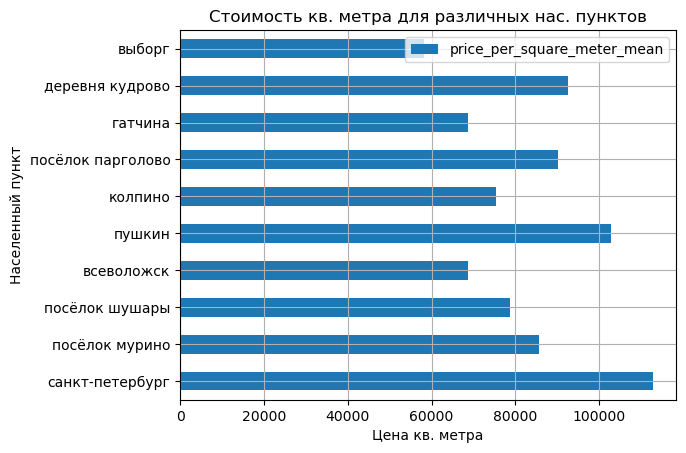

In [97]:
top_locality.plot(kind='barh', y='price_per_square_meter_mean', title='Стоимость кв. метра для различных нас. пунктов', grid=True)
plt.xlabel('Цена кв. метра')
plt.ylabel('Населенный пункт')
plt.show()

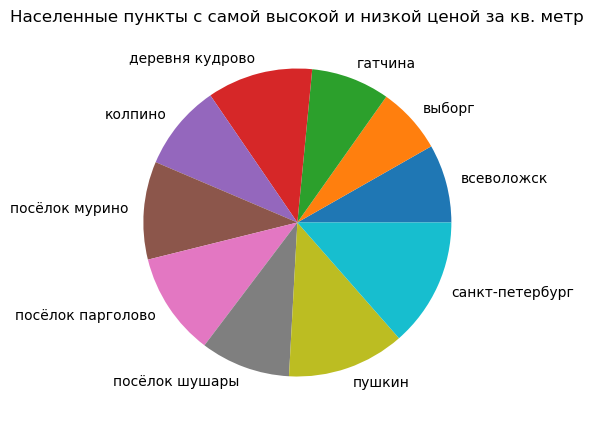

In [98]:
top_locality.pivot_table(index='locality_name', values='price_per_square_meter_mean').plot(kind='pie', y='price_per_square_meter_mean', figsize=(10,5), label='', legend=False, title='Населенные пункты с самой высокой и низкой ценой за кв. метр')
plt.show()

**Вывод:**

Гипотеза подтвердилась.

Лидером по количеству размещенных объявлений является **Санкт-Петербург** (15721), который составляет 66% всех объявлений и более чем в 30 раз оторвался от второго населенного пункта в списке – поселка **Мурино** (522) и в 30 раз от поселка **Шушары** (440).

По цене за квадратный метр можно сделать вывод, что количество объявлений не влияет на стоимость квартиры. Примерами являются Пушкин (103 тыс., 369) и деревня Кудрово (92 тыс., 299), отстают по количеству объявлений, но всего лишь на два десятка тысяч различаются от лидера, Санкт-Петербурга (114 тыс., 15721), в стоимости квартир.

**Населённые пункты с самой высокой стоимостью квадратного метра:**
- Санкт-Петербург (114 тыс.)
- Пушкин (103 тыс.)
- деревня Кудрово (92 тыс.)
- поселок Парголово (90 тыс.)
- поселок Мурино (85 тыс.)

**Населённые пункты с самой низкой стоимостью квадратного метра:**
- поселок Шушары (78 тыс.)
- Колпино (75 тыс.)
- Всеволожск (68,7 тыс.)
- Гатчина (68,7 тыс.)
- Выборг (58 тыс.)

### Средняя цена каждого километра до центра города

Четвертая гипотеза предполагает, что чем ближе к центру города, тем дороже будет обходиться покупаемая квартира и выше средняя цена каждого километра.

In [99]:
data.loc[data['locality_name'] == 'санкт-петербург'].pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')

,last_price
city_centers_nearest_km,
0,1.359813e+07
1,1.272641e+07
2,1.303150e+07
3,1.052445e+07
4,1.184748e+07
5,1.190705e+07
6,1.235284e+07
7,1.049130e+07
8,8.239554e+06


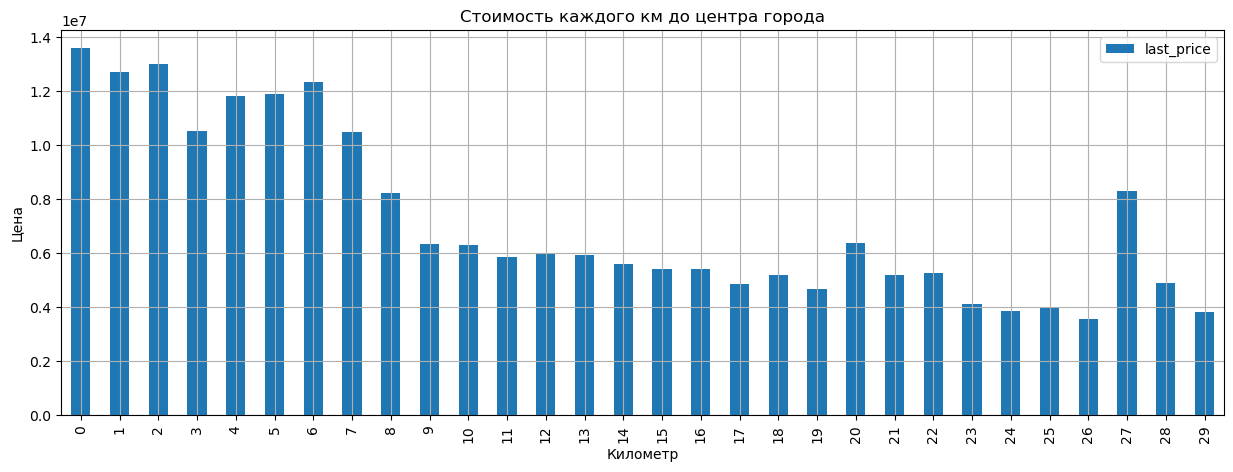

In [100]:
(data.loc[data['locality_name'] == 'санкт-петербург']
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
    .plot(kind='bar', y='last_price', figsize=(15, 5), title='Стоимость каждого км до центра города', grid=True)
)
plt.xlabel('Километр')
plt.ylabel('Цена')
plt.show()

**Вывод:**

Гипотеза подтвердилась.

Очевидно, что чем ближе к центру, тем дороже будет обходиться средний километр и сама квартира. Максимальная стоимость км перед центром Санкт-Петербурга. Стоимость продолжает колебаться до 8 км и далее плавно убывает с редкими пиками (27 км). Возможно, на 27 км находится элитная недвижимость, повышающая цену, для того чтобы добраться до центра города. 

**Промежуточный вывод:**

В результате исследовательского анализа данных были:

- проверены значения датафрейма на наличие взаимозависимостей (`total_area`, `living_area`, `kitchen_area`,  `last_price`, `rooms`, `ceiling_height`, `floor`, `floor_category`, `floors_total`, `city_centers_nearest_km`, `airports_nearest`, `parks_nearest`, `exposition_day`, `exposition_month`, `exposition_year`)
- выявлена средняя длителность размещения объявлений
- изучено влияние следующих факторов на стоимость объектов (`total_area`, `living_area`, `kitchen_area`, `rooms`, `floor_category`, `exposition_day`, `exposition_month`, `exposition_year`)
- получена средняя стоимость квадратного метра
- получена средняя стоимость каждого километра к центру города

## Общий вывод

**Исследование объявлений о продаже квартир успешно проведено.** 

Была решена следующая **задача:** выполнена предобработка и исследовательский анализ данных для выявления  особенностей и зависимостей, которые существуют на рынке недвижимости.

**Использованные входные данные:** данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.


1. Былы осуществлены **изучение общей информации** о предоставленных данных и их **предобработка**:
    
    - обработаны пропущенные значения (заполнены нулевыми значениями, официальными стандартами или удалены),
    - восстановлен единый стиль заголовков (приведены к нижнему регистру),
    - проверены данные на явные дубликаты,
    - устранены неявные дубликаты (ё --> е, поселок городского типа --> поселок),
    - удалены аномальные значения и редкие, выбивающиеся значения,
    - изменены типы данных.
    

2. Были **изучены параметры объектов** и **получены следующие выводы** в ходе исследовательского анализа данных:

- `total_area`: максимальные значения от 30 до 50 кв. м
- `living_area`: максимальное значение – 18 кв. жилой площади, что соответствует стандартным минимальным метражом для проживания одного человека. 
- `kitchen_area`: имеется три максимальных пиковых значения: 7, 10, 12 кв. м.
- `last_price`: пиковое значение достигается при стоимости в 0,35 (3,5 млн).
- `rooms`: представлено пиковое значение, 2 комнаты, а также идентичное первому по количестве объявлений второе максимальное значение в 3 комнаты.
- `ceiling_height`: максимальная высота потолка достигает чуть больше 3 м, что является стандартом.
- `floor`: наиболее пользующимися спросом этажами являются этажи с первого по пятый включительно (в особенности примерно 2 и 4 этажи).
- `floor_category`: по большинству объявлений продаются квартиры с типом этажа "другой", около 15500 размещений.
- `floors_total`: преобладают значения в 5-6, а также 9-10 этажей.
- `city_centers_nearest_km`: пиковое значение наблюдается у объявлений с минимальным расстоянием до центра города: в пределах 1000-2000 м. 
- `airports_nearest`: в основном квартиры расположены в ближайшем доступе к аэропорту (до 1000-2000 м). 
- `parks_nearest`: большинство квартир находится в свободном доступе к ближайшим паркам (до 200 м).
- `exposition_day`, `exposition_month`, `exposition_year`: в большинстве случаев объявления размещали во вторник и четверг, а меньше всего в выходные дни. Чаще всего публиковали объявления в первом квартале года: феврале и марте, а также в равных долях в апреле и ноябре. Больше всего объявлений было размещено в 2017 и 2018 годах, когда соответственно спрос на недвижимость был максильмано высоким.

3. Были **выдвинуты гипотезы** и **получены следующие выводы**:

- проверка длительности размещения объявлений
    
**первоначальная гипотеза:** в среднем поиск покупателя квартиры занимает от трех до шести месяцев.
   
- проверка факторов, наиболее существенно влияющих на общую (полную) стоимость объекта
    
**первоначальная гипотеза:** на стоимость квартиры влияют все имеющиеся факторы в различной степени. Наиболее сильно может быть выражено влияние общей площади и количества комнат.
    
- проверка стоимости одного квадратного метра в зависимости от населенных пунктов
    
**первоначальная гипотеза:** чем ближе к центру города, тем дороже квадратный метр.
    
- проверка стоимости каждого километра в зависимости от удаленности от центра города
    
**первоначальная гипотеза:** чем ближе к центру города, тем дороже будет обходиться покупаемая квартира и выше средняя цена каждого километра.

***

**Общие выводы:**

1. **Поиск покупателя квартиры по медианному значению действительно занимает по медианному значению три месяца.**

*Первоначальная гипотеза частично подтверждена.*

* **Среднее время продажи квартиры составляет 184 дней. Медианное значение в 2 раза меньше и составляет 101 день.**
    Такая существенная разница обусловлена наличием многолетних неактуальных объявлений. 


* **Длительными продажами являются продажи дольше трех месяцев. Быстрыми являются продажи меньше трех месяцев.**

   
*Рекомендации:*

- желательно отслеживать статус объявления: является оли оно до сих пор актуальным и не было снято собственником квартиры или наоборот.


2. **Большинство факторов в разных соотношениях действительно влияют на стоимость объекта.** 

*Первоначальная гипотеза частично подтверждена.*

* **Зависимость от ценой и различными параметрами имеет нисходящую тенденцию от общей площади квартиры до даты размещения объявления:**

    - `last price` и **`total_area`** - 74%

    - `last price` и **`living area`** - 64%

    - `last price` и **`kitchen_area`** - 53%

    - `last price` и **`rooms`** - 45%


* **Цена объекта зависит от первых четырех параметров в убывающем порядке и не имеет взаимозависимости с типом этажа и датой публикации объявления.**


3. **В самом центре стоимость квартир действительно будет наиболее высокой по сравнению с другими населенными пунктами.** 

*Первоначальная гипотеза подтверждена.*

* **Лидером по количеству размещенных объявлений является Санкт-Петербург** (15721).

* **Количество объявлений не влияет на стоимость квартиры:**

    - Пушкин (103 тыс., 369)
    - деревня Кудрово (92 тыс., 299) 
    - Санкт-Петербург (114 тыс., 15721)

Данные населенные пункты отстают по количеству объявлений, но всего лишь на два десятка тысяч различаются от лидера, Санкт-Петербурга, в стоимости квартир.

4. **Чем ближе к центру, тем дороже будет обходиться средний километр и сама квартира.**

*Первоначальная гипотеза подтверждена.*

* **Максимальная стоимость километра имеется вблизи центра Санкт-Петербурга.**

***

**Заключение:**

Полученные результаты исследования могут послужить базой при построении автоматизированной системы для отслеживания аномалий и мошеннической деятельности. 

При анализе каждого из поставленных факторов были получены данные, на которые можно опираться в других исследованиях. 

***

**Общие рекомендации:**

- в параметрах `living_area` и `days_exposition` содержатся пропуски, которые не были устранены в данном исследовании в связи с возможным искажением данных, которые необходимо проверить для проведения других исследований.

- желательно обозначать, что объявление до сих пор является актуальным и не было снято собственником квартиры.

- желательно проверять параметры квартиры на соблюдение принятых в России строительных норм и правил.

- желательно провести анализ пропущенных и аномальных значений, нивелированных в ходе анализа, а также при наличии информации указывать причину пропуска рядом с конкретными данными.

- желательно предложить сотрудникам разработать гайдбук с принципами единого стиля оформления датасета для избежания возможных ошибок в данных.